**Course Announcements**
 
- Due Friday (11:59 PM):
    - D3
    - Q3
    - Project Proposal
    - [Weekly Project Survey](https://docs.google.com/forms/d/e/1FAIpQLSf_ZLgO19fSP8CnUTzmOgDo6Es0Rj5frpP_OMSscfqrF0Nseg/viewform?usp=sf_link) (*optional*; link also on Canvas Assignments)
    
Notes:
- Previous Project Review Scores Posted
- D2 lab 
    - still grading, but generally strong; see answer key for reading URL directly using `pandas`
    - answers are included in XX_lab_answers in lecture notes repo

**Previous Project Review Summary**

Pros:
- Interesting: picked an interesting/novel topic
- Appropriate: used relevant, appropriate datasets/combined disparate data sources well
- Organized: used subsections/headers, well written, clear, clear visualizations, code commented

Cons:
- Lacking: interpretation/explanation lacking
- Unclear: decisions in analysis not explained
- Incomplete: lack of sources/sources out of date; Background section lacking necessary detail
- Too Extra: Printing out the full dataset
- Inconsistent: visualizations, code/variable naming, explanation/organization, formatting, etc. 

# Descriptive Analysis

- Size
- Missingness
- Shape
- Central Tendency
- Variability

<div class="alert alert-success">
The goal of a <b>descriptive analysis</b> is to understand and summarize information about the variables stored in your dataset.
</div>

### Setup

The packages and settings we'll use in this workbook:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7) #increase figure size

import seaborn as sns
sns.set(style='white', font_scale=2) #set style

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, norm, bernoulli, poisson

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

## The Data

To walk through these concepts today, we're going to use your responses from after the Data Intuition Lecture.

In [2]:
# read data into Python
df = pd.read_csv('data/fermi_sp21.csv')

In [3]:
# take a look at the data
df

,Timestamp,How fast does human hair grow (cm/yr)?,"If every living person stood crammed together side-by-side, how large of an area would they occupy (km²)?","How many days would it take to walk from San Diego to New York City (assuming no stopping to fix shoes, apply sunscreen, or for sleeping, eating, or other biological needs)?"
0,4/7/2021 9:59:28,100,10000,10
1,4/7/2021 12:45:54,10 cm/yr,7000 km^2,45 days
2,4/7/2021 19:17:46,20,10000,50
3,4/9/2021 9:10:29,20,1000000,500
4,4/9/2021 9:10:31,10cm/yr,1km^2,20 days
...,...,...,...,...
80,4/9/2021 9:12:39,15,"500,000",5 days
81,4/9/2021 9:12:45,15cm,"1,000,000 km^2",30 days
82,4/9/2021 9:13:02,15 cm/yr,1 billion,30 days
83,4/9/2021 9:15:15,4,"22,500,000,000",50


### Data Cleaning & Wrangling

Tidy Data Rules (Review):
1. Every observation in a row
2. Every variable in a column
3. If multiple tables, column on which to merge

#### Clicker Question #1

Are these data in the tidy data format?

- A) Yes, these data are ready to analyze
- B) Yes, but there is more work to do before analysis
- C) No, not tidy
- D) Have no idea what you're talking about

**Brainstorming**

What considerations do we have to make about these data?
- shorten column/variable names
- standardize responses
    - make measurements uniform
    - remove units
- string to int/float (want to work with #s)
- consider missing values


In [4]:
# change column names
df.columns = ['timestamp', 'hair_growth', 'crammed', 'SAN_NYC']
df.head()

,timestamp,hair_growth,crammed,SAN_NYC
0,4/7/2021 9:59:28,100,10000,10
1,4/7/2021 12:45:54,10 cm/yr,7000 km^2,45 days
2,4/7/2021 19:17:46,20,10000,50
3,4/9/2021 9:10:29,20,1000000,500
4,4/9/2021 9:10:31,10cm/yr,1km^2,20 days


In [5]:
# check type of each Series (column)
df.dtypes

timestamp      object
hair_growth    object
crammed        object
SAN_NYC        object
dtype: object

## Size

As discussed previously, knowing and checking the size of your data helps you:
- understand what information you have
- know if it read into Python correctly
- determine what analyses are appropriate

In [6]:
# determine rows and columns in df
df.shape

(85, 4)

We now know that we have information about 85 students across 4 variables.

## Missingness

Data can be missing for all kinds of reasons. It's your job to determine if:
- values are missing at random
- values are missing due to data entry errors
- values are missing due to faulty data collection



In [7]:
# True if row contains at least one null value
# axis argument: 0 for reducing by ‘index’, 1 for reducing by ‘columns’,
null_rows = df.isnull().any(axis=1)
df[null_rows].shape

(0, 4)

In [8]:
# columns with missing values
df.columns[df.isnull().any(axis=0)]

Index([], dtype='object')

In [9]:
# number of missing values by column
df.isnull().sum()

timestamp      0
hair_growth    0
crammed        0
SAN_NYC        0
dtype: int64

## Cleaning: Hair Growth

How fast does human hair grow (cm/yr)?

In [10]:
# take a look at unique values
df["hair_growth"].unique()

array(['100', '10 cm/yr', '20', '10cm/yr', '10', '3', '10cm', '15 cm/yr',
       '200', '5/year', '20 cm/year', '5', '50', '2', '8cm a year',
       '1,000cm/yr', '60', '6', '14cm/yr', '2cm', '52.8', '12 cm/yr',
       '24', '20cm/yr', '20 cm/yr', '72 cm/yr', '20cm/1yr', '12',
       '100cm/yr', '5 cm/y', '8', '4', '365', '13 cm/yr', '30 cm/yr',
       '12 cm/ yr', '5 cm/yr', '55', '35', '1000', '15cm/yr', '15', '40',
       '7', '30', '0.1', '15cm'], dtype=object)

In [11]:
# standardize height column
def standardize_hair(string):
    
    # Basic string pre-processing
    string = string.lower()
    string = string.strip()    

    # take care of inclded unit cases   
    string = string.replace("cm a year", "")
    string = string.replace("cm/year", "")
    string = string.replace("cm/ye", "")
    string = string.replace("centimeters", "")
    string = string.replace("cm per year", "")
    string = string.replace("cm/yr", "")
    string = string.replace("cm/1yr", "")
    string = string.replace("cm/y", "")
    string = string.replace("cm/1 year", "")
    string = string.replace("year", "")
    string = string.replace("yr", "")
    string = string.replace("cm", "")    
    string = string.replace("/", "")
    string = string.replace(",", "")

    string = string.replace("^2", "0")
    
    string = string.strip()

    # convert to numeric
    try:
        output = float(eval(string))
    except:
        output = np.nan
    
    return output

In [12]:
# apply function across values in hair growth columns
df["hair_growth"] = df["hair_growth"].apply(standardize_hair)
df["hair_growth"].unique()

array([1.00e+02, 1.00e+01, 2.00e+01, 3.00e+00, 1.50e+01, 2.00e+02,
       5.00e+00, 5.00e+01, 2.00e+00, 8.00e+00, 1.00e+03, 6.00e+01,
       6.00e+00, 1.40e+01, 5.28e+01, 1.20e+01, 2.40e+01, 7.20e+01,
       4.00e+00, 3.65e+02, 1.30e+01, 3.00e+01, 5.50e+01, 3.50e+01,
       4.00e+01, 7.00e+00, 1.00e-01])

## Cleaning: Crammed

If every living person stood crammed together side-by-side, how large of an area would they occupy (km²)?

In [13]:
df['crammed'].unique()

array(['10000', '7000 km^2', '1000000', '1km^2', '100000', '1500000',
       '20,000 km^2', '10000000', '100 million', '10,000 km^2',
       '5000000000', '700000000', '1000', '230,000', 'Texas?', '2000',
       '2222', '100000000', '50', '1000000000000', '5000', '100',
       '500000 km²', "i'm bad at area lol", '300', '100000 km', '400',
       '6,000,000,000 km^2', '10,000km^2', '100000000 km2', '800,000km^2',
       '20,000,000,000,000', '25000', '807', '50000000', '500,000 km^2',
       '100 km^2', '10', '1,000,000', '2 billion', '200', '0.04',
       '100,000,000', '28,000,000', '1million', '15,000',
       '100,000,000km²', '8 million ', '7000', '70000000', '420',
       '2000000', '500,000', '1,000,000 km^2', '1 billion',
       '22,500,000,000', '190000'], dtype=object)

In [14]:
# standardize crammed column
def standardize_crammed(string):    
    # Basic string pre-processing
    string = string.lower()
    string = string.strip()
    
    # take care of commas
    string = string.replace(",", "")

    # take care of specific cases
    string = string.replace("texas?", "696200")
    string = string.replace("i'm bad at area lol", "NaN")

    # take care of inclded unit cases
    string = string.replace("^2", "")
    string = string.replace("²", "")
    string = string.replace("km", "")
    
    # take care of scientific notation / word cases
    string = string.replace(" million", "000000")
    string = string.replace(" billion", "000000000")

    string = string.strip()


    # convert to numeric
    try:
        output = float(eval(string))
    except:
        output = np.nan
    
    return output

In [15]:
# apply function across values in crammed columns
df["crammed"] = df["crammed"].apply(standardize_crammed)
df["crammed"].unique()

array([1.000e+04, 7.000e+03, 1.000e+06, 1.000e+00, 1.000e+05, 1.500e+06,
       2.000e+04, 1.000e+07, 1.000e+08, 5.000e+09, 7.000e+08, 1.000e+03,
       2.300e+05, 6.962e+05, 2.000e+03, 2.222e+03, 5.000e+01, 1.000e+12,
       5.000e+03, 1.000e+02, 5.000e+05,       nan, 3.000e+02, 4.000e+02,
       6.000e+09, 8.000e+05, 2.000e+13, 2.500e+04, 8.070e+02, 5.000e+07,
       1.000e+01, 2.000e+09, 2.000e+02, 4.000e-02, 2.800e+07, 1.500e+04,
       8.000e+06, 7.000e+07, 4.200e+02, 2.000e+06, 1.000e+09, 2.250e+10,
       1.900e+05])

## Cleaning: San Diego to NYC

How many days would it take to walk from here to New York City (assuming no stopping to fix shoes, apply sunscreen, or for sleeping, eating, or other biological needs)?

In [16]:
df['SAN_NYC'].unique()

array(['10', '45 days ', '50', '500', '20 days', '9', '63', '14 days ',
       '50 days', '100', '30 days', '3', '7', '31', '45 days',
       'Over 3000 days?', '14', '30', '19', '40', '2 months', '150',
       '10000', '4 weeks', '15', '180', '700 days', '65 days', '25 days',
       '1500', '90 days', '20 days ', '300', '120 days', '20', '90',
       '1000', '5000', '14 days', '60', '15 days', '4 days', '42', '45',
       '100000', '700', '43', '200 days', '28', '200', '5 days'],
      dtype=object)

In [17]:
# standardize distance column
def standardize_distance(string):
    
    orig = string
    output = None
    
    # Basic string pre-processing
    string = string.lower()
    string = string.strip()
    
    # remove units
    string = string.replace("days", "")
    
    # remove uncertainty
    string = string.replace("?", "")

    # remove modifier
    string = string.replace("over", "")

    # take care of non-days answers
    string = string.replace("2 months", "60")
    string = string.replace("4 weeks", "30")

    # take care of scientific notation 
    string = string.replace("10^3", "10000")
    
    string = string.strip()

    # convert to numeric
    output = float(string)
    
    return output

In [18]:
# alternate approach to the same task
def dist_helper(distance):
    if len(distance) == 1:
        return distance[0]
    if distance[1] == '*':
        return str(float(distance[0]) * float(distance[2]))
    if distance[1] == '/':
        return str(float(distance[0]) / float(distance[2]))

df["SAN_NYC_alt"] = pd.to_numeric(df["SAN_NYC"].
                              str.lower().
                              replace({"days?":"", 
                                       "\^":"e", "^\([\w */)=?]+$":"1000", 
                                       " months?":" * 30", 
                                       " hours?": " / 24", 
                                       " years?": " * 365"}, regex = True).
                              str.strip().
                              str.split(' ').
                              apply(dist_helper), errors = 'coerce')


In [19]:
# apply function across values in crammed columns
df["SAN_NYC"] = df["SAN_NYC"].apply(standardize_distance)
df["SAN_NYC"].unique()

array([1.0e+01, 4.5e+01, 5.0e+01, 5.0e+02, 2.0e+01, 9.0e+00, 6.3e+01,
       1.4e+01, 1.0e+02, 3.0e+01, 3.0e+00, 7.0e+00, 3.1e+01, 3.0e+03,
       1.9e+01, 4.0e+01, 6.0e+01, 1.5e+02, 1.0e+04, 1.5e+01, 1.8e+02,
       7.0e+02, 6.5e+01, 2.5e+01, 1.5e+03, 9.0e+01, 3.0e+02, 1.2e+02,
       1.0e+03, 5.0e+03, 4.0e+00, 4.2e+01, 1.0e+05, 4.3e+01, 2.0e+02,
       2.8e+01, 5.0e+00])

#### Return to missingness

Note that after cleaning, we DO have missing values. These would be worth looking into further; being sure we understand *why* they're missing

In [20]:
# number of missing values by column
df.isnull().sum()

timestamp      0
hair_growth    0
crammed        3
SAN_NYC        0
SAN_NYC_alt    2
dtype: int64

In [21]:
null_rows = df.isnull().any(axis=1)
df[null_rows]

,timestamp,hair_growth,crammed,SAN_NYC,SAN_NYC_alt
18,4/9/2021 9:11:04,15.0,6.962000e+05,3000.0,NaN
26,4/9/2021 9:11:09,1000.0,1.000000e+12,30.0,NaN
31,4/9/2021 9:11:11,2.0,NaN,65.0,65.0
38,4/9/2021 9:11:18,72.0,NaN,15.0,15.0
67,4/9/2021 9:11:47,10.0,NaN,3.0,3.0


## Shape

The shape of your data dictates what analyses you can do. Today, we'll review a number of different distributions (shapes) data can take and examples of data that take that distribution.

### Uniform Distribution

<div class="alert alert-success">
The Uniform distribution has the property that every outcome has the equal probability of occurring. In other words, all outcomes are equally likely.
</div>

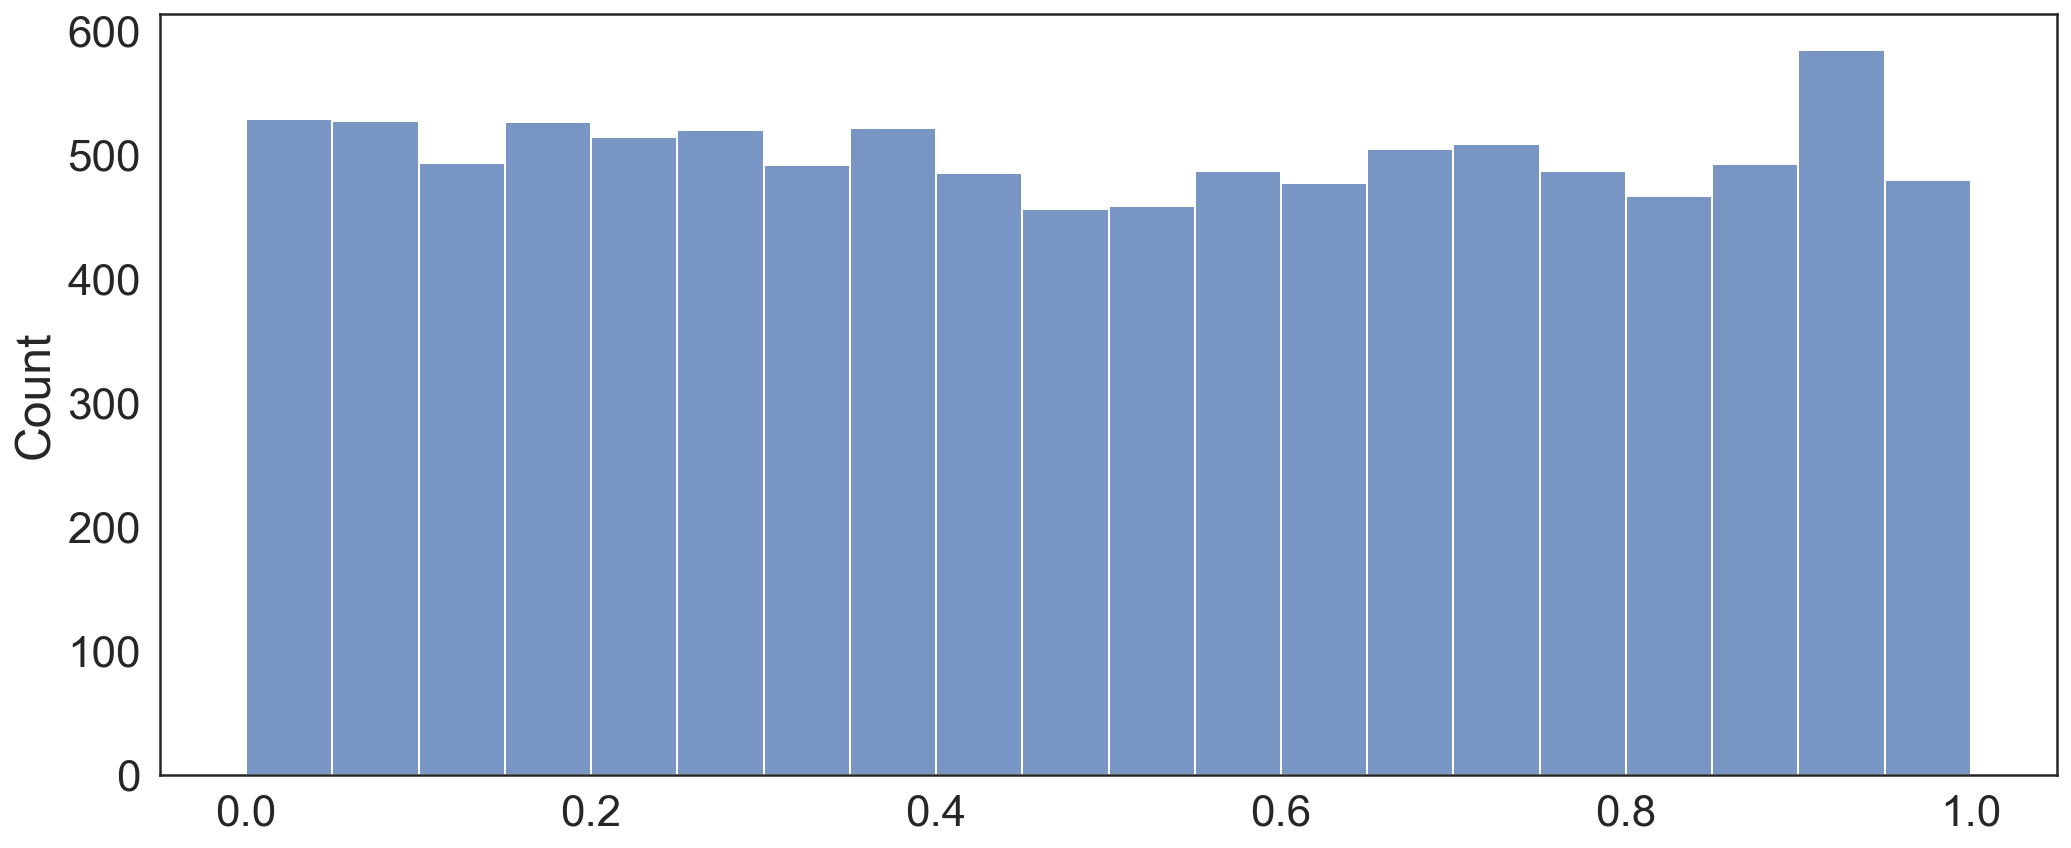

In [24]:
dat = uniform.rvs(size=10000)
sns.histplot(dat, bins=20);

The **probability of rolling a given number on a fair die** is the same each time you roll the die - an example of a Uniform distribution.

The **probability of pulling a spade out of a deck of cards** is the same each time you pull a card out of the deck.

The **probability of flipping a heads each time you flip a fair coin** is the same each time you flip the coin.

### Normal Distribution

<div class="alert alert-success">
The Normal (also Gaussian, or 'Bell Curve') distribution, is a distribution defined by its mean and standard deviation.
</div>

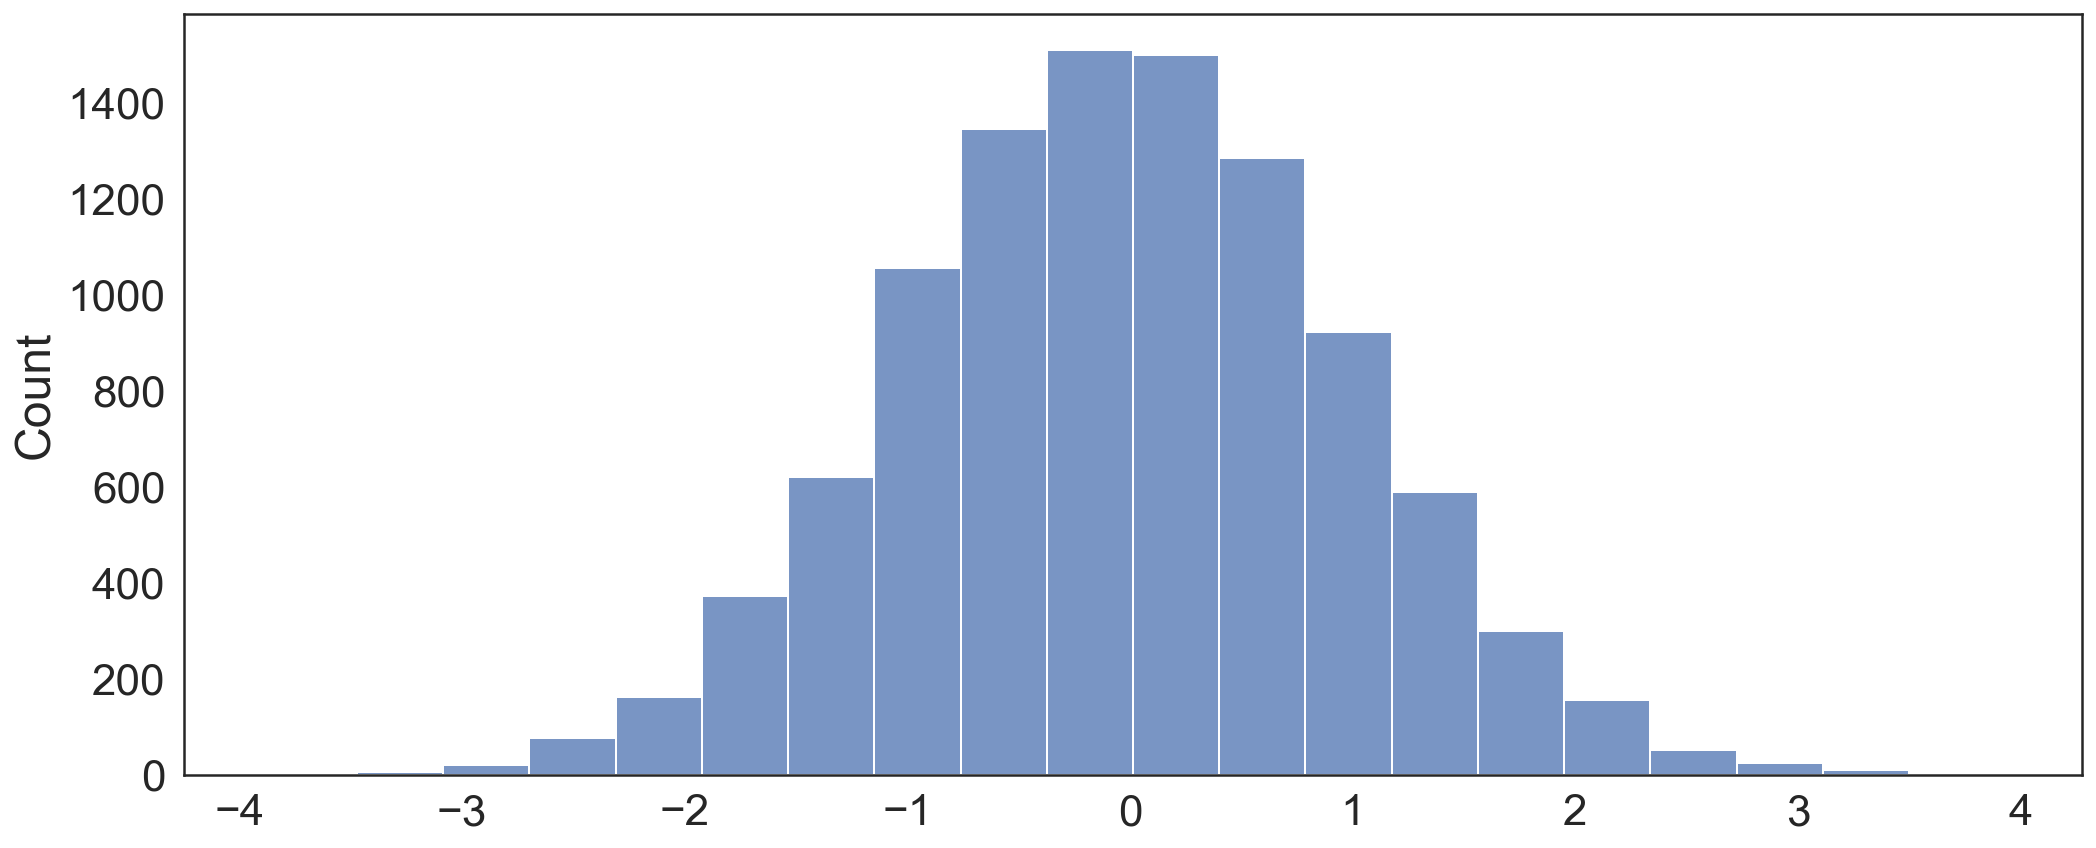

In [25]:
# loc specifies mean
# scale specifies the standard deviation
dat = norm.rvs(loc=0, scale=1, size=10000)
sns.histplot(dat, bins=20);

With a standard Normal curve:
- 68% of the values fall within one standard deviation [-1,1]
- 95% of the values fall within two standard deviations [-2,2]

The **Normal distribution** is taught all over the place, and this is because it shows up all over the place. It's found in nature and across measurements we take all the time. It's also easy to understand and to work with statistically.

The **average height of players in the NBA** follows a Normal distribution, with the average height being 6'7". 

If you were to **flip a fair coin 16 times** and count the number of heads each time...and then repeat this 1000 times, recording the number of heads each time, this would follow a Normal distribution. 8 would be the most popular number of heads, but there would be a normal distribution centered on 8 for these data.

### Bimodal Distributions

<div class="alert alert-success">
A Bimodal Distribution is a distribution with two peaks - it often indicates that you have information about two groups. 
</div>

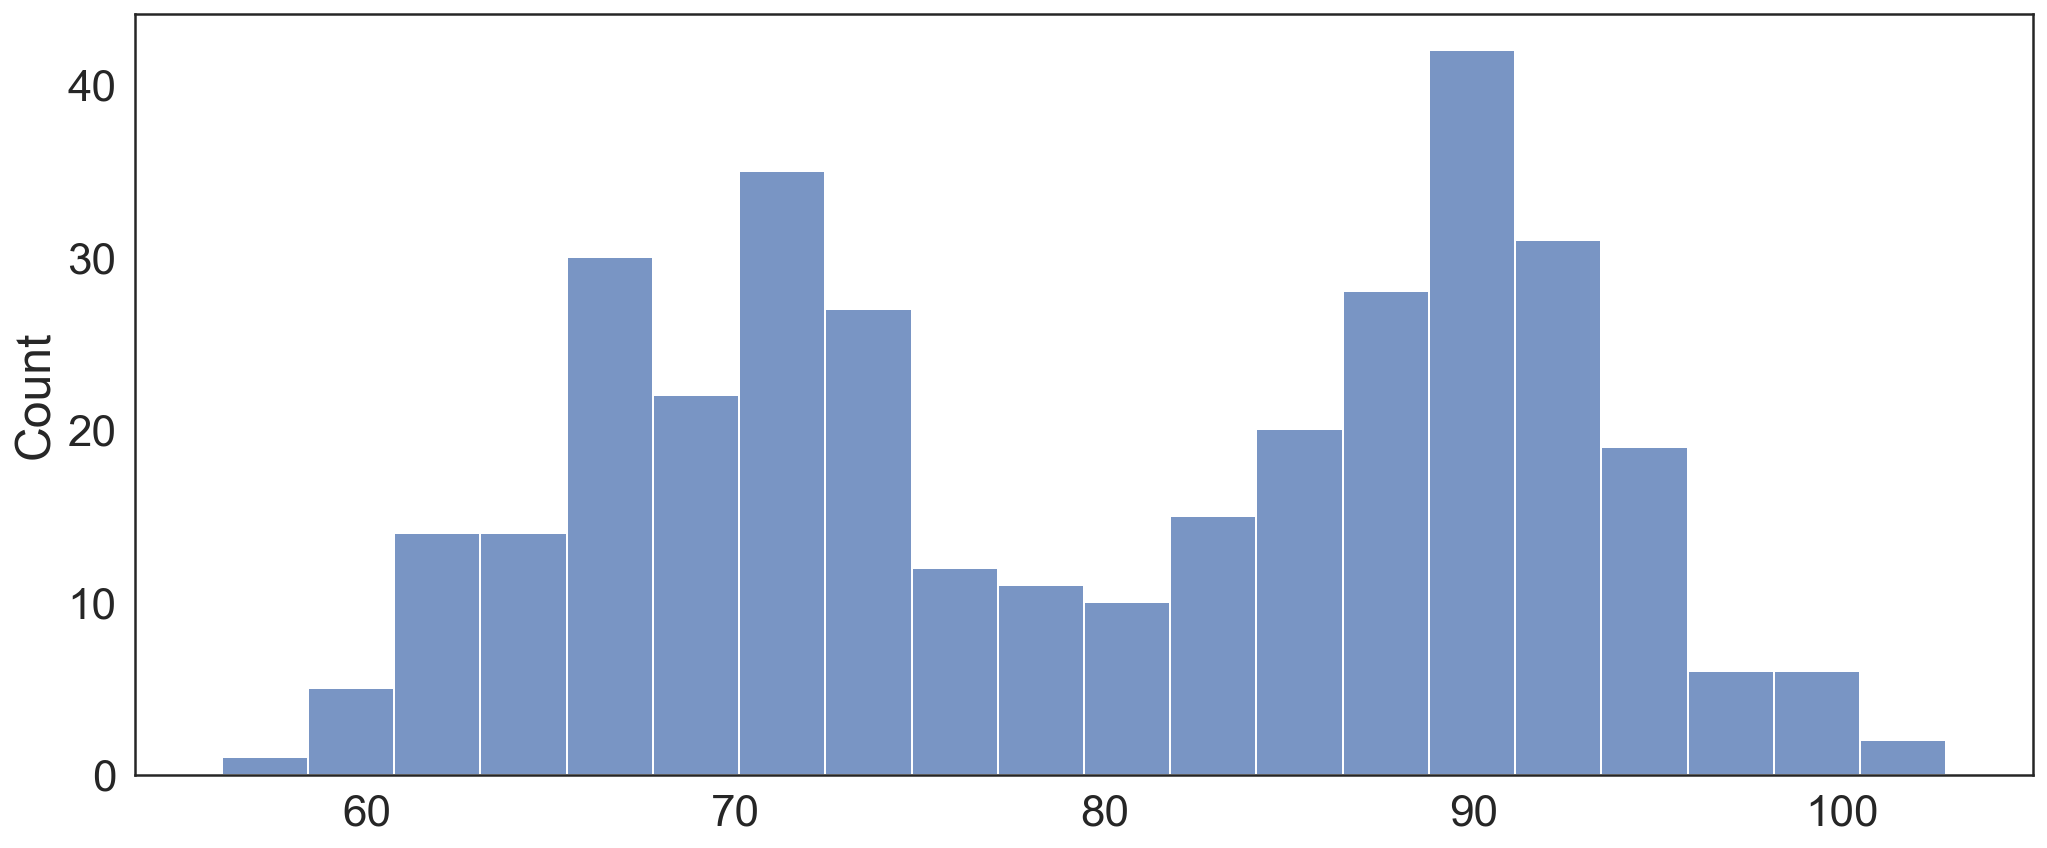

In [26]:
loc1, scale1, size1 = (90, 5, 175)
loc2, scale2, size2 = (70, 5, 175)
bi = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), 
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
sns.histplot(bi, bins=20);

When **test scores in a class** are bimodal, often one peak describes those students who studied, while the other are those who didn't study or are struggling more with the course material.

Another example of a bimodal distribution are **the number of visitors at a restaurant over time**. Often restaurants will get a peak of visitors at lunchtime and dinnertime, with lulls in between.

### Bernoulli Distribution

<div class="alert alert-success">
A Bernouilli Distribution is a binary distribution - it takes only two values (0 or 1), with some probability $p$. 
</div>

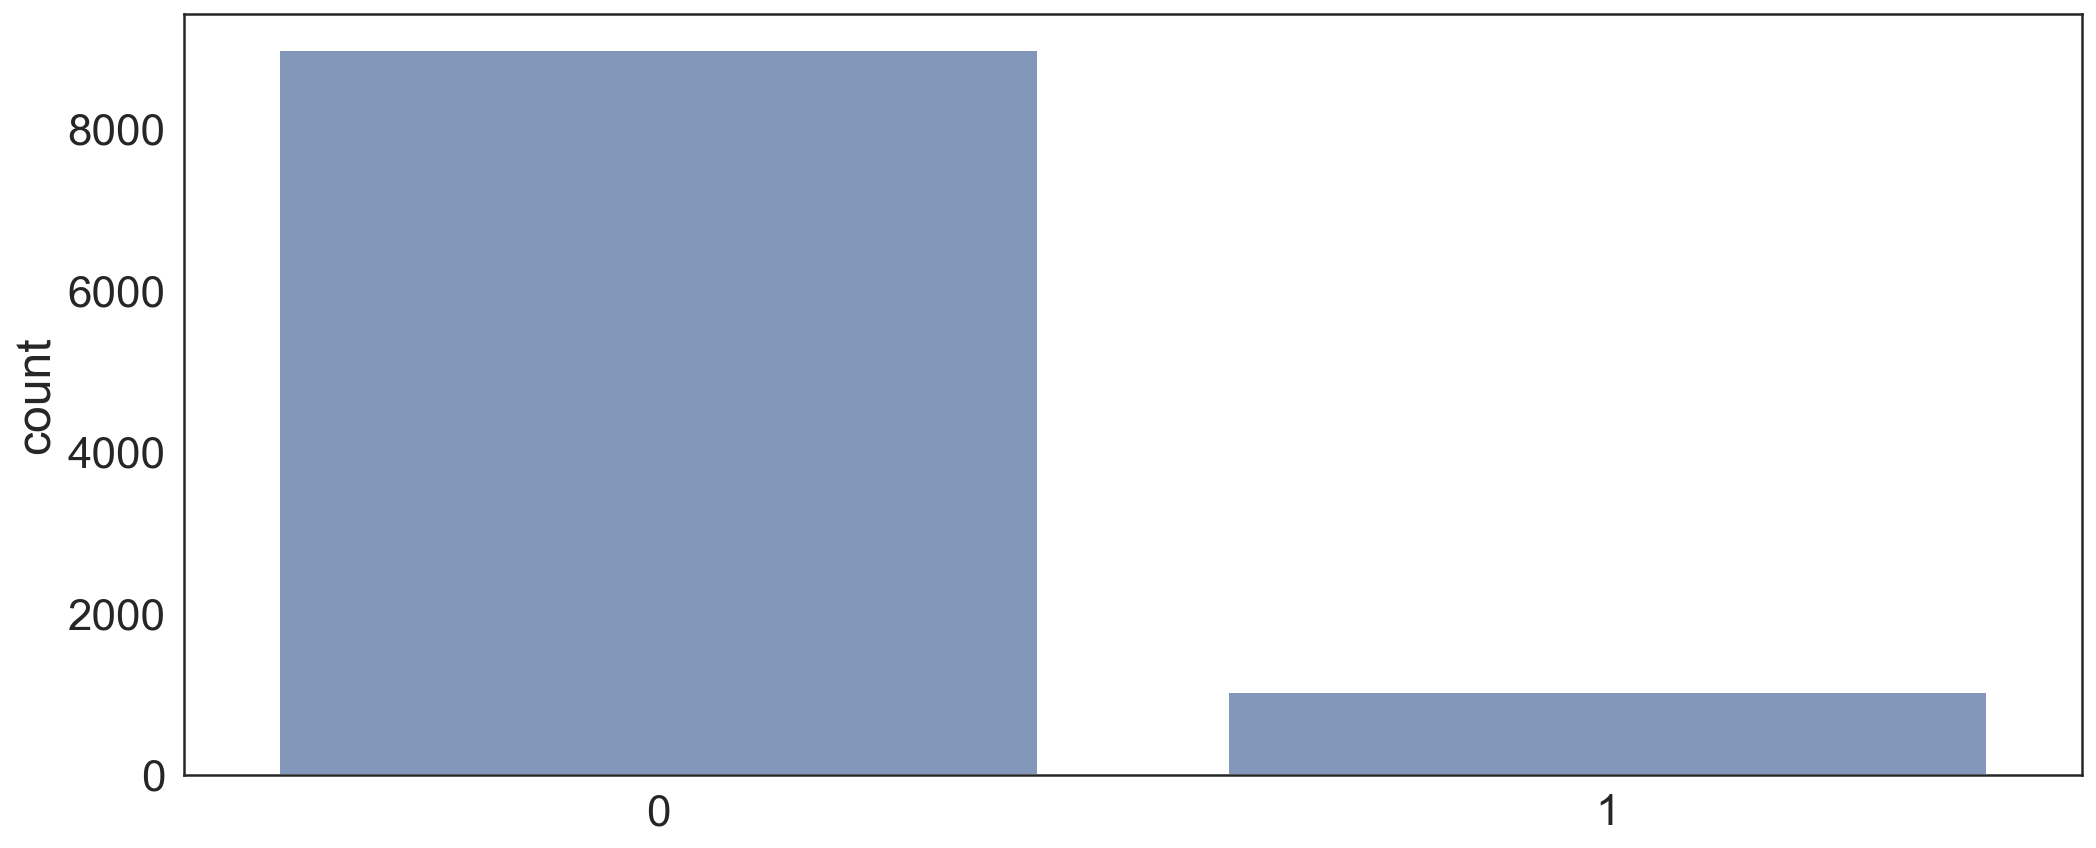

In [27]:
r = bernoulli.rvs(0.1 , size=10000)
sns.countplot(r, color='#7995C3');

Usually the value 1 indicates 'success' and 0 indicates 'failure'

Whether a **team will win a championship or not** follows a Bernoulli distribution - the team will either win (1 = success) or lose (0 = failure), and there is some probability ($p$) assigned to each of those values.

Similarly, **whether you pass each exam at UCSD** follows a Bernoulli distribution - either you pass (1 = success) or you fail (0 = failure), and there is some probability assinged to each.

There are distributions that are built off of the Bernoulli Distribution, defined as follows:
- **Binomial Distribution**: Number of success in $n$ trials
- **Geometric Distribution**: Number of failures before the first success
- **Negative Binomial Distribution**: Number of failures before the $x^{th}$ success

### Poisson Distribution

<div class="alert alert-success">
The Poisson Distribution models events in fixed intervals of time, given a known average rate (and independent occurences).
</div>

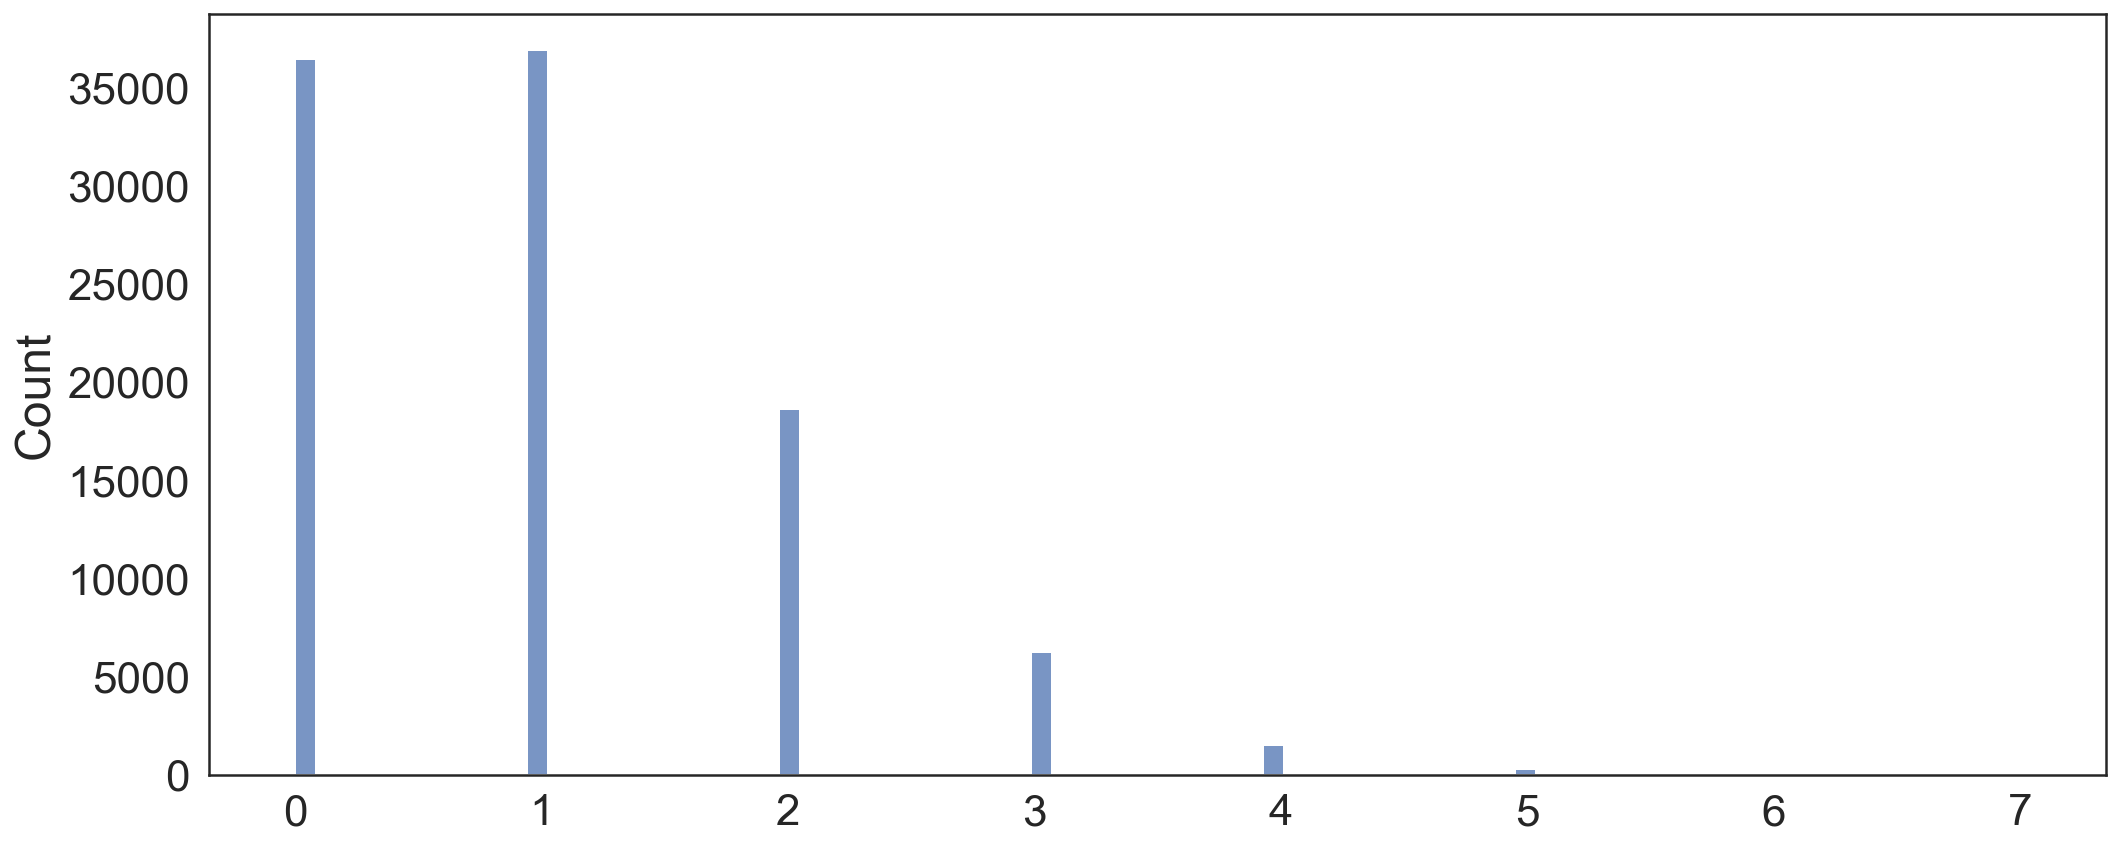

In [28]:
dat = poisson.rvs(mu=1, size=100000)
sns.histplot(dat);

The **number of visitors a fast food drive-through gets each minute** follows a Poisson distribution. In this case, maybe the average is 3, but there's some variability around that number. 

A Poisson distribution can help calculate the probability of various events related to customers going through the drive-through at a restaurant. It will predict lulls (0 customers) and flurry of activity (5+ customers), allowing staff to plan and schedule more precisely.

#### Clicker Question #2

Which of the following would you expect to be **bimodal**?

- A) heights from a random sample of females in the US
- B) daily chance of winning the lottery
- C) number of siblings everyone in this class has
- D) distribution of speed limits in the US
- E) ages of everyone in this class

#### Clicker Question #3

The "winning" number in a lottery follows a...

- A) Normal Distribution
- B) Uniform Distribution
- C) Skewed-right distribution
- D) Bimodal Distribtuion
- E) Bernoulli Distribution

#### Shape: Fermi Data

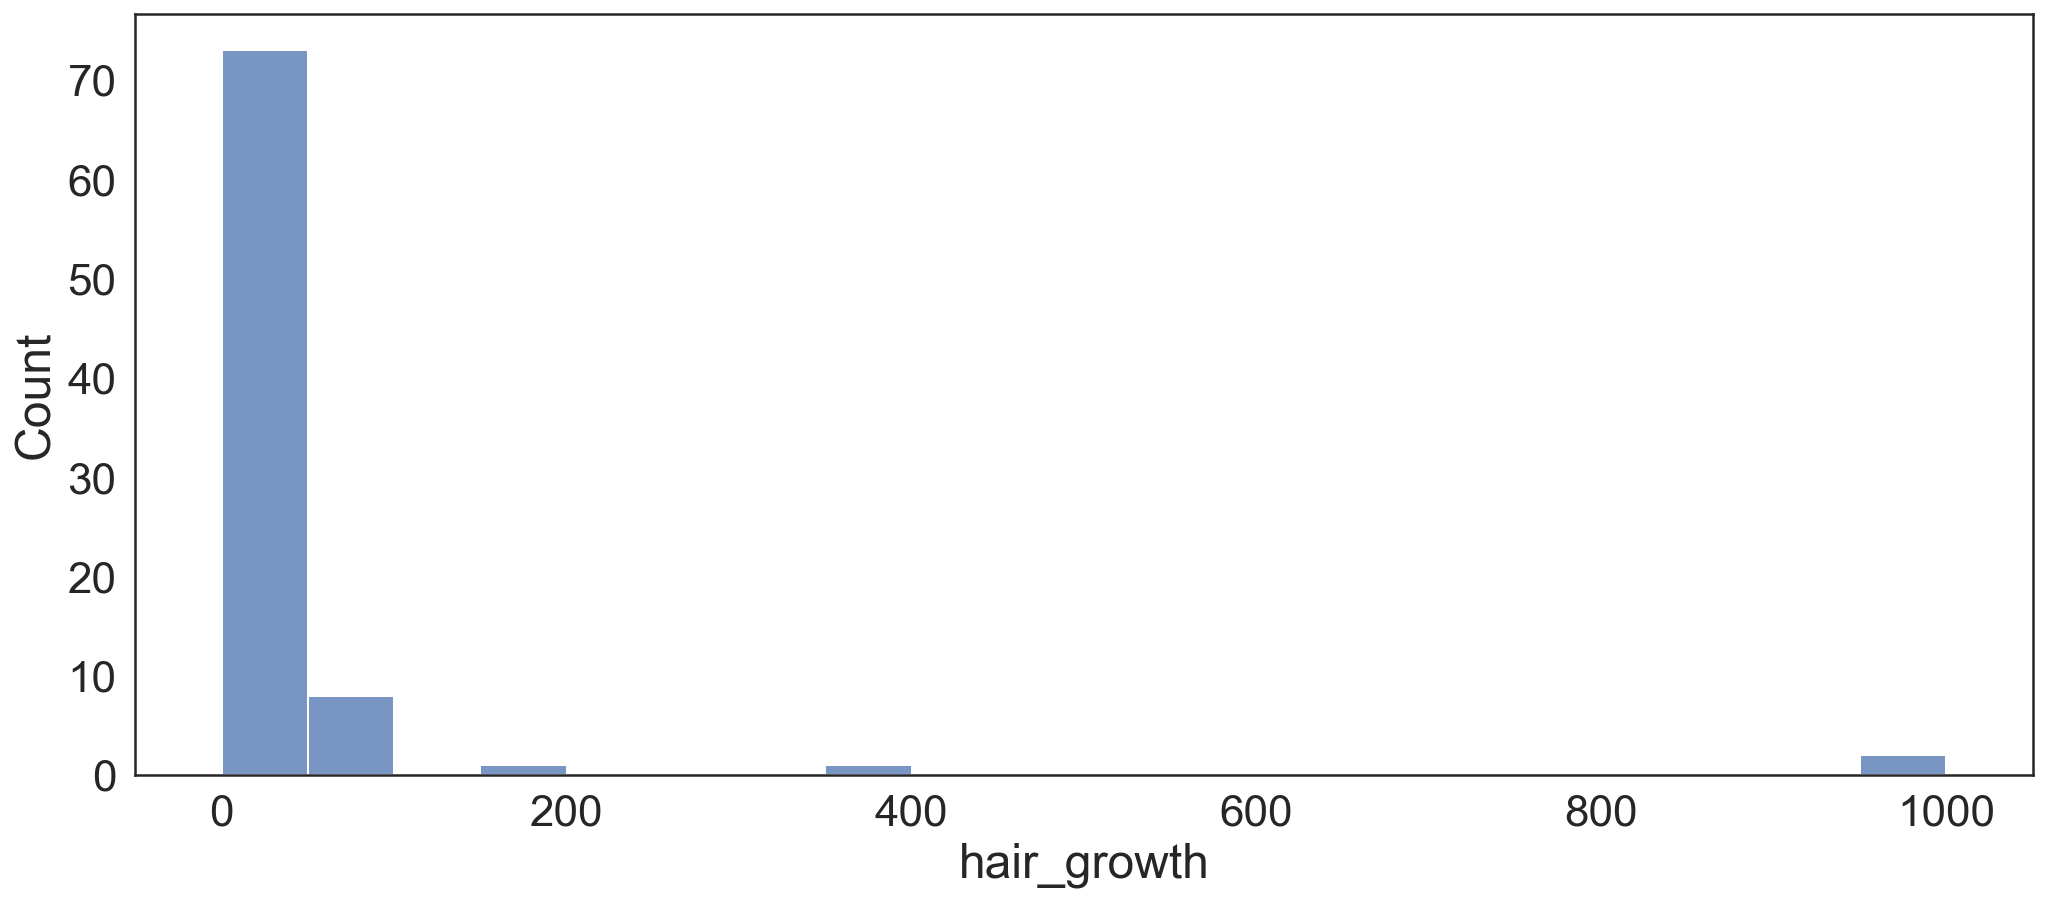

In [29]:
sns.histplot(df['hair_growth'], kde=False, bins=20);

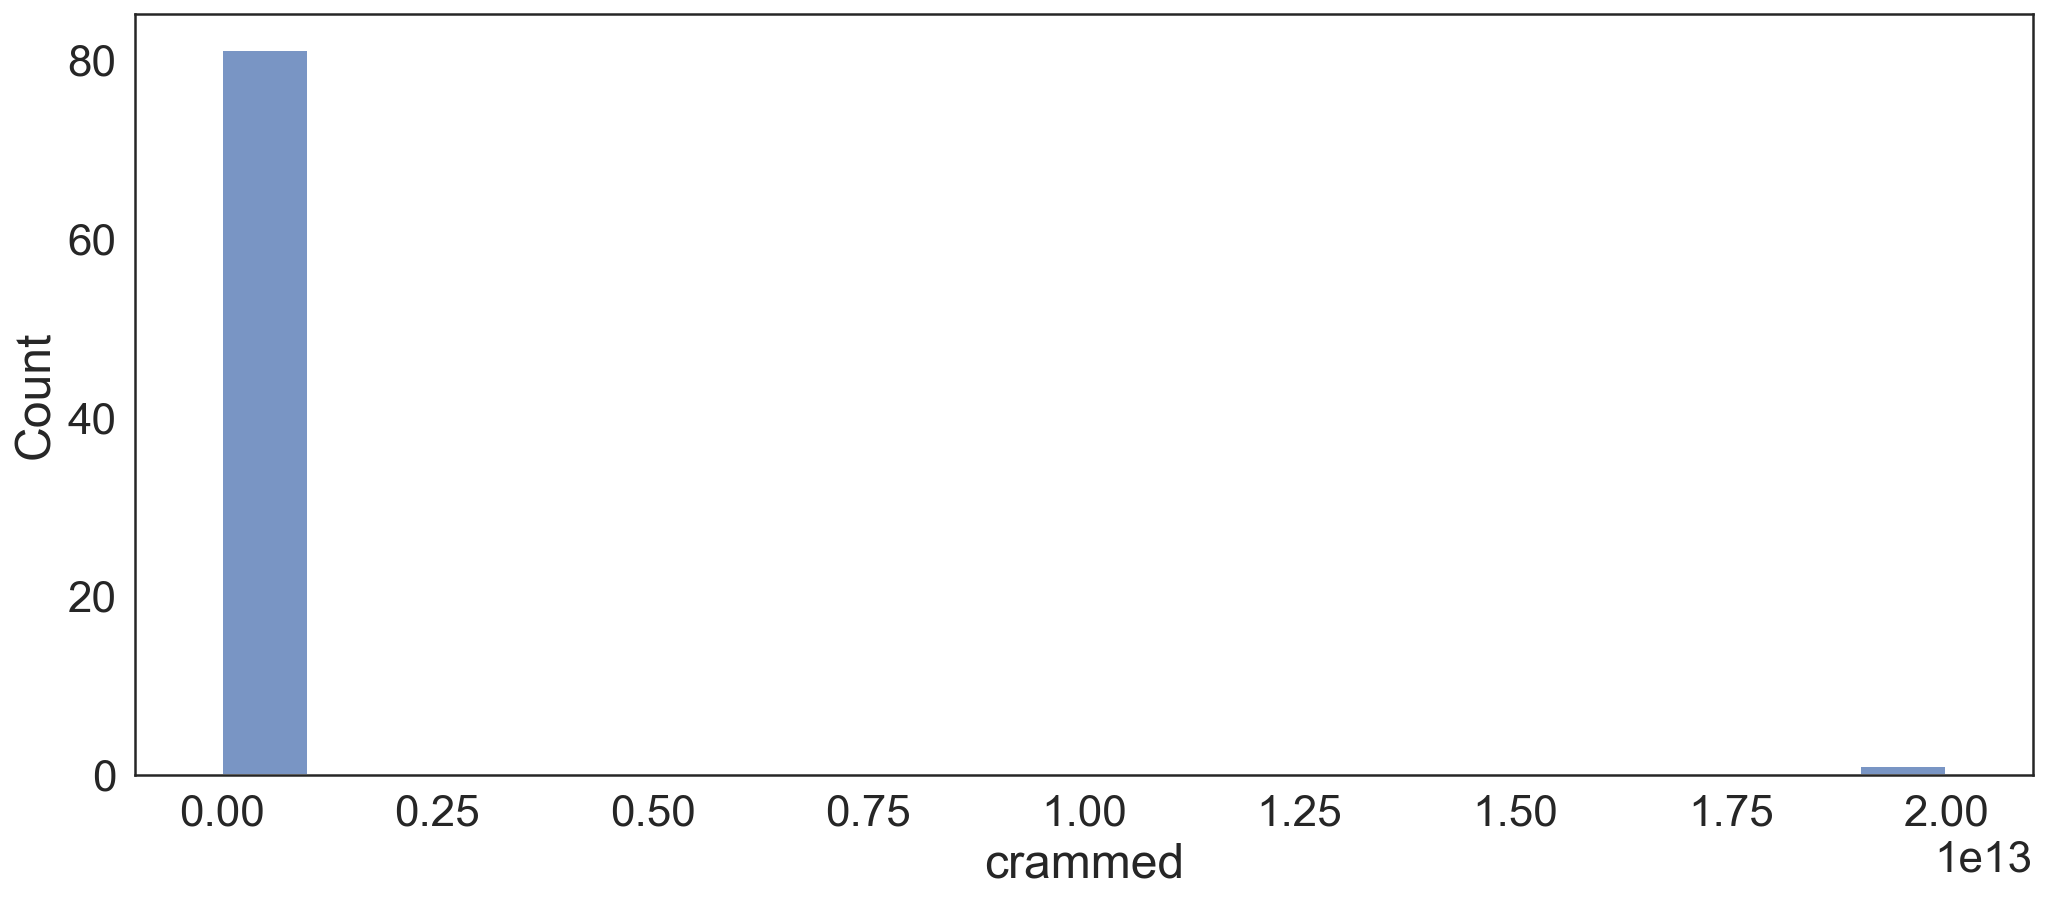

In [30]:
sns.histplot(df['crammed'], kde=False, bins=20);

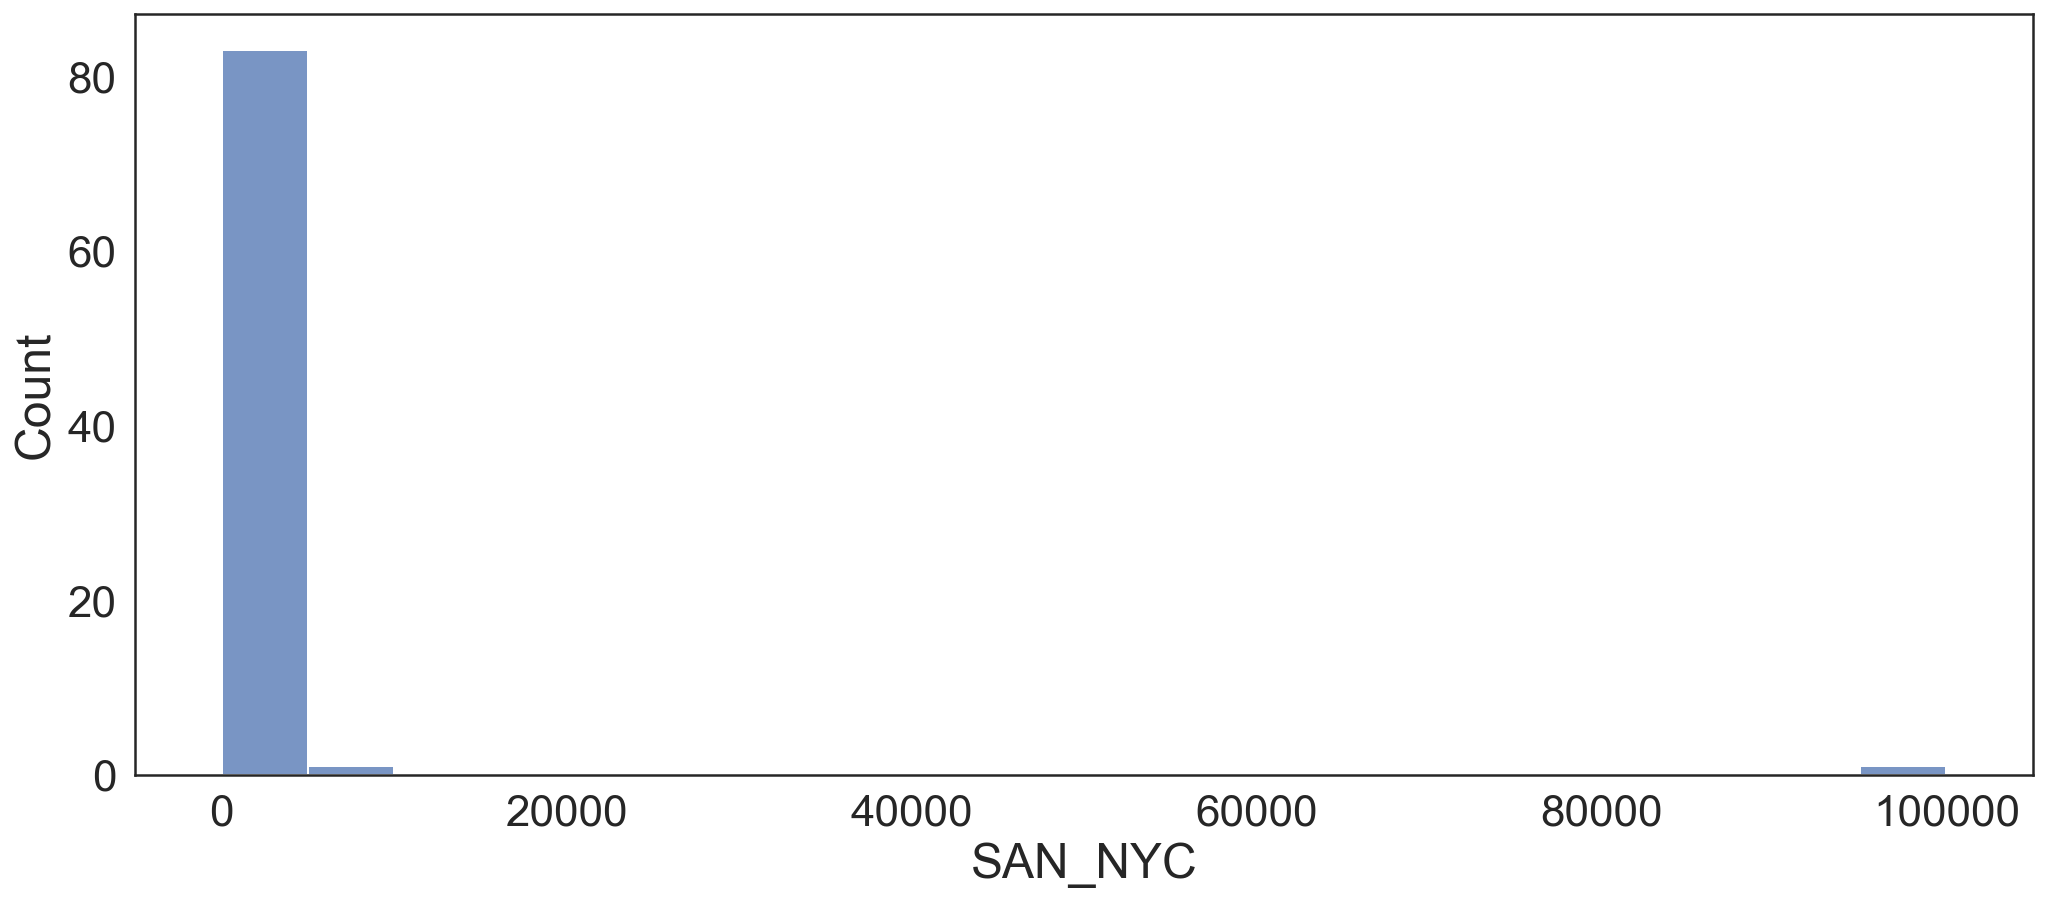

In [31]:
sns.histplot(df['SAN_NYC'], kde=False, bins=20);

### Data Transformations

We haven't discussed skewed distributions yet; however, all three variables here are **skewed right**, meaning there is a tail off to the right and most values are found near the lower portion of the distribution.

These sorts of distributions are hard to analyze because deviations from the norm are driving the variation in the distribution...even though they are few in number.

Often, when you have skwewed data, you'll want to transform the variable.

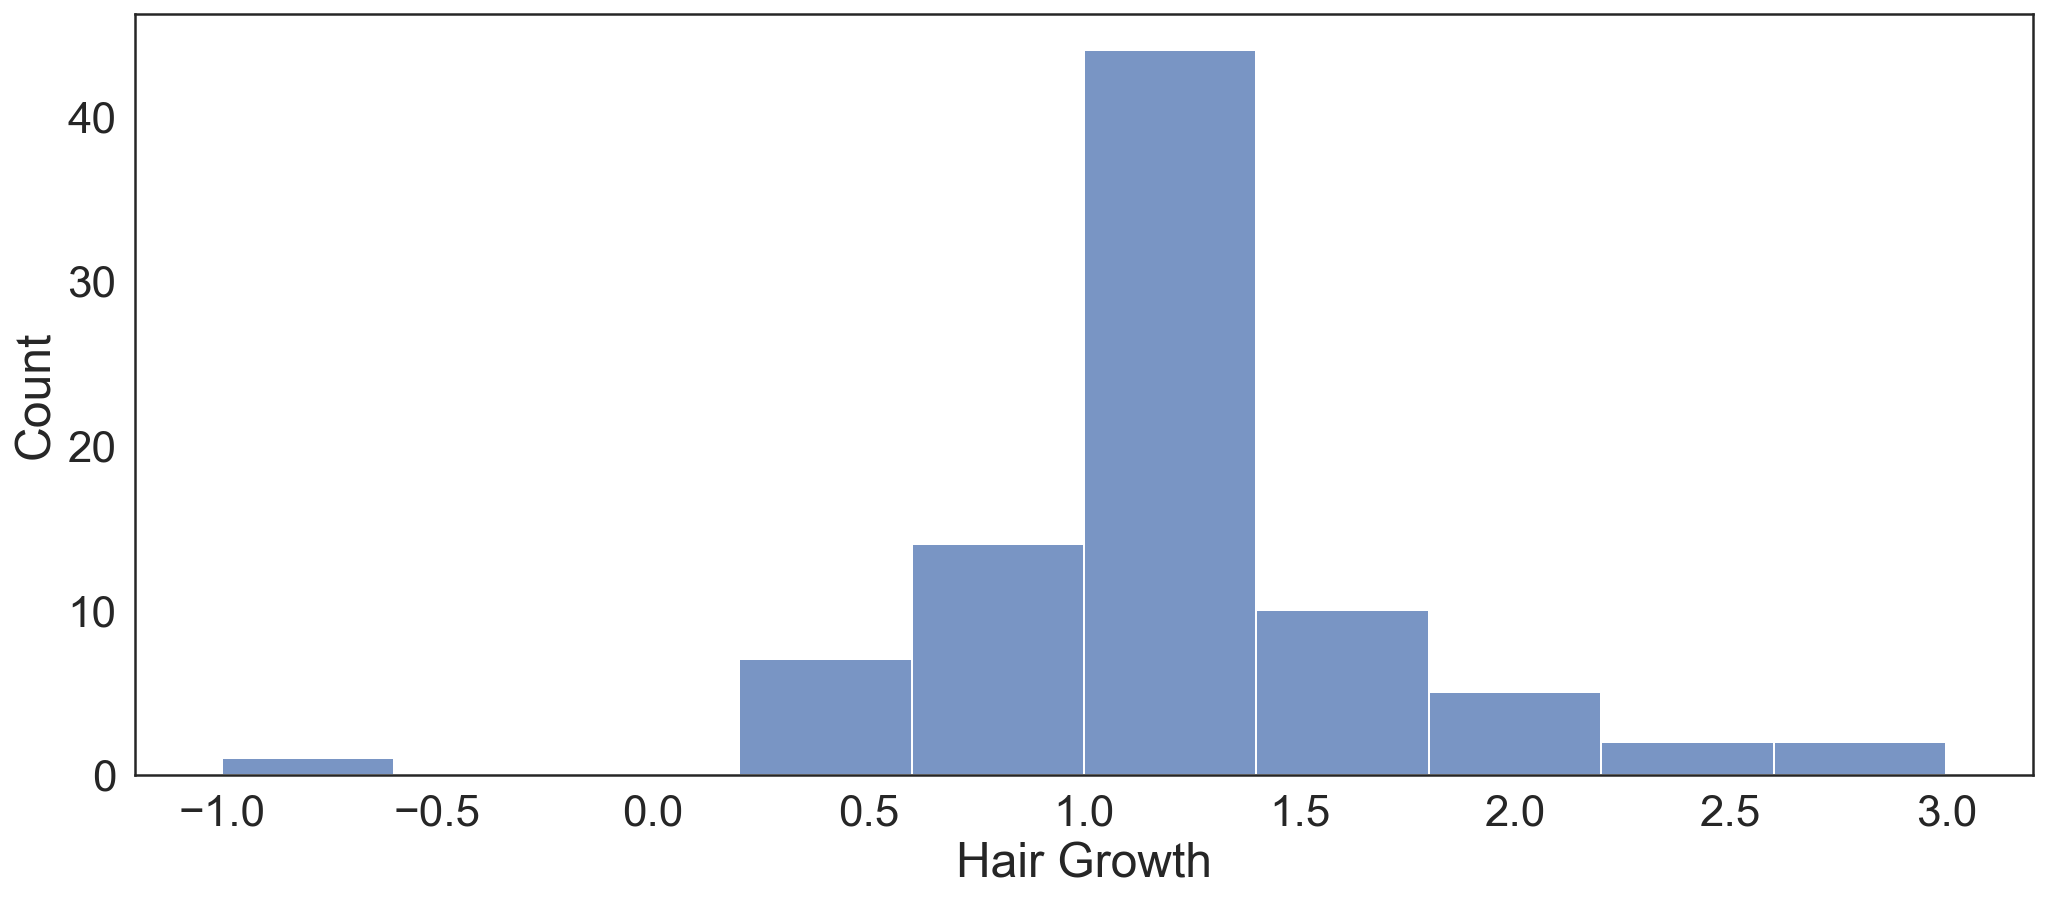

In [32]:
# log transformed data
sns.histplot(np.log10(df['hair_growth'][df['hair_growth'].notnull()]), bins=10)
plt.xlabel('Hair Growth');

After transforming the data, the values appear approximately Normal. Those high values are no longer driving variation in the data. However, we're now on a log-scale, which sometimes makes interpretation a bit more difficult.

### Outliers

Outliers are values that fall outside the typical range of your dataset. These can occur for all types of reasons:

- data entry errors
- poor sampling procedures
- technical or mechanical errors
- unexpected changes in weather
- extreme values
- people giving incorrect information
- etc.

<div class="alert alert-danger">
Caution: Observations should only be removed from your dataset if you have a valid reason to do so. If you remove outliers from your dataset, your report should be <b>very</b> clear that you did so.
</div>

![outliers](img/outliers.png)

Link to Tweet: https://twitter.com/ChelseaParlett/status/1356285012375556109  
Thread on possible approaches: https://twitter.com/IsabellaGhement/status/1356645319799308288

## Central Tendency

- mean 
- median
- mode

The Central Tendency tells you the 'typical' value for an observation in your dataset.

### Mean


$$ \bar x = \frac{\sum\limits_{i = 1}^N x_i}N  $$


- $x_i$ = ith element of the sample
- $\bar x$ = sample mean
- $N$ = sample size


In [33]:
# to calculate mean
sum(df['hair_growth'])/len(df)

49.351764705882346

In [34]:
df['hair_growth'].mean()

49.351764705882346

In [35]:
# check mean for each column
df.mean()

hair_growth    4.935176e+01
crammed        2.565608e+11
SAN_NYC        1.530776e+03
SAN_NYC_alt    1.531157e+03
dtype: float64

### Median

In [36]:
# check median for each column
df.median()

hair_growth       12.0
crammed        20000.0
SAN_NYC           50.0
SAN_NYC_alt       50.0
dtype: float64

### Median vs. Mean

When the median and mean are not similar to one another...what's the best approach?

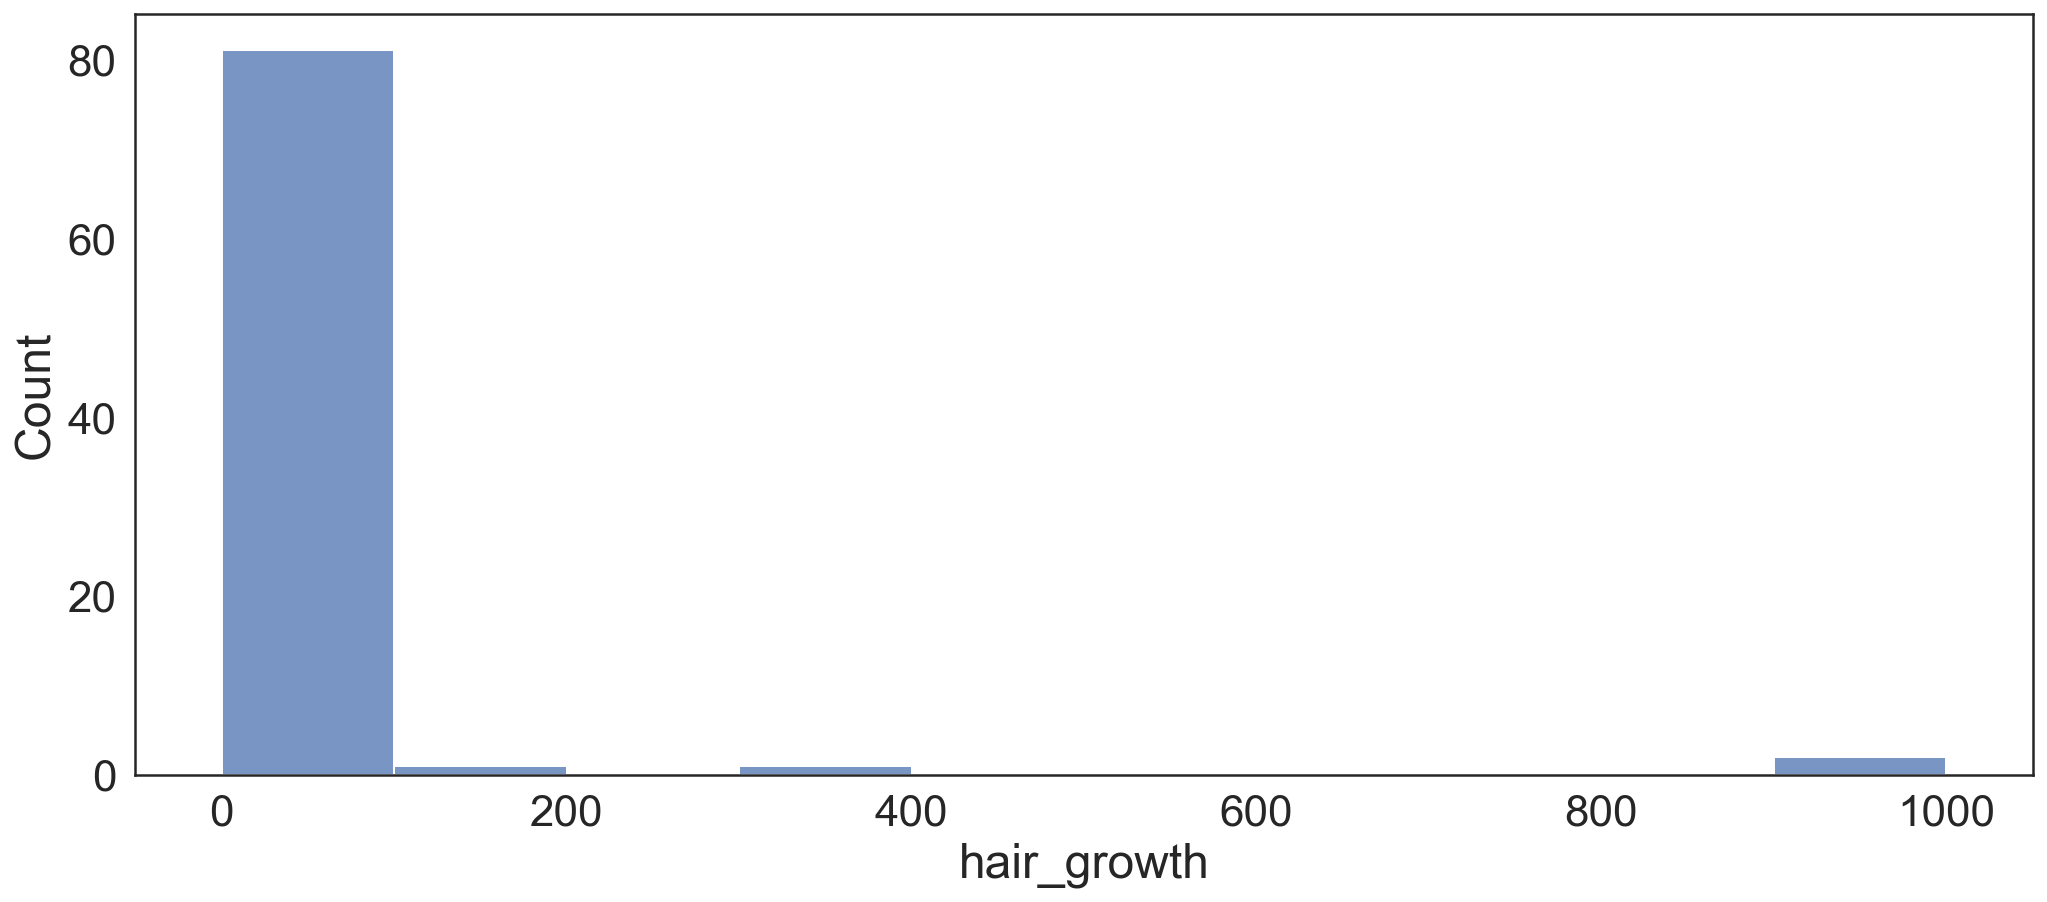

In [37]:
# relook at the distribution for bodywt
sns.histplot(df['hair_growth'], bins=10);

In [38]:
# median and mean for same series
print( 'median: ', df['hair_growth'].median())
print( 'mean: ', df['hair_growth'].mean())

median:  12.0
mean:  49.351764705882346


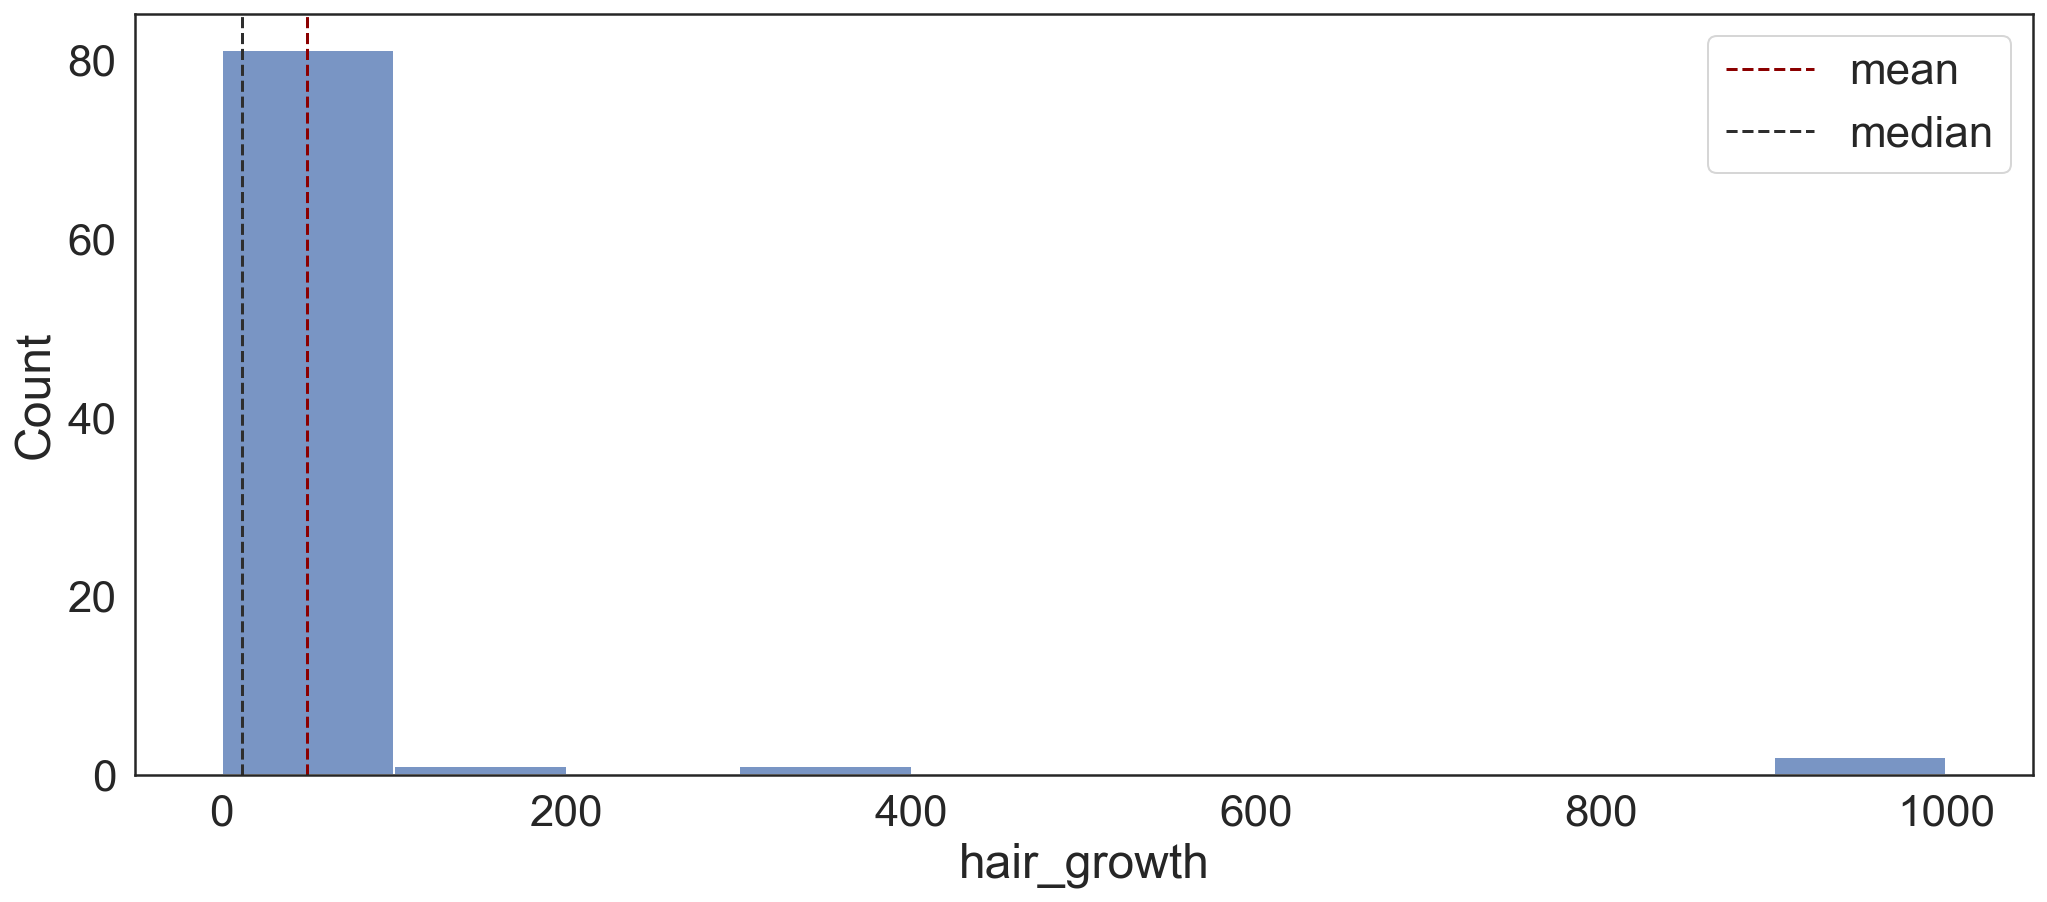

In [39]:
# take a look at it all together
ax = sns.histplot(df['hair_growth'], bins=10);
ax.axvline(df['hair_growth'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['hair_growth'].median(), color='#2e2e2e', linestyle='--', label='median')
ax.legend();

#### Clicker Question #4

Which of the following is the best way to measure the central tendency of `hair_growth` in these data?

- A) mean
- B) median
- C) mode

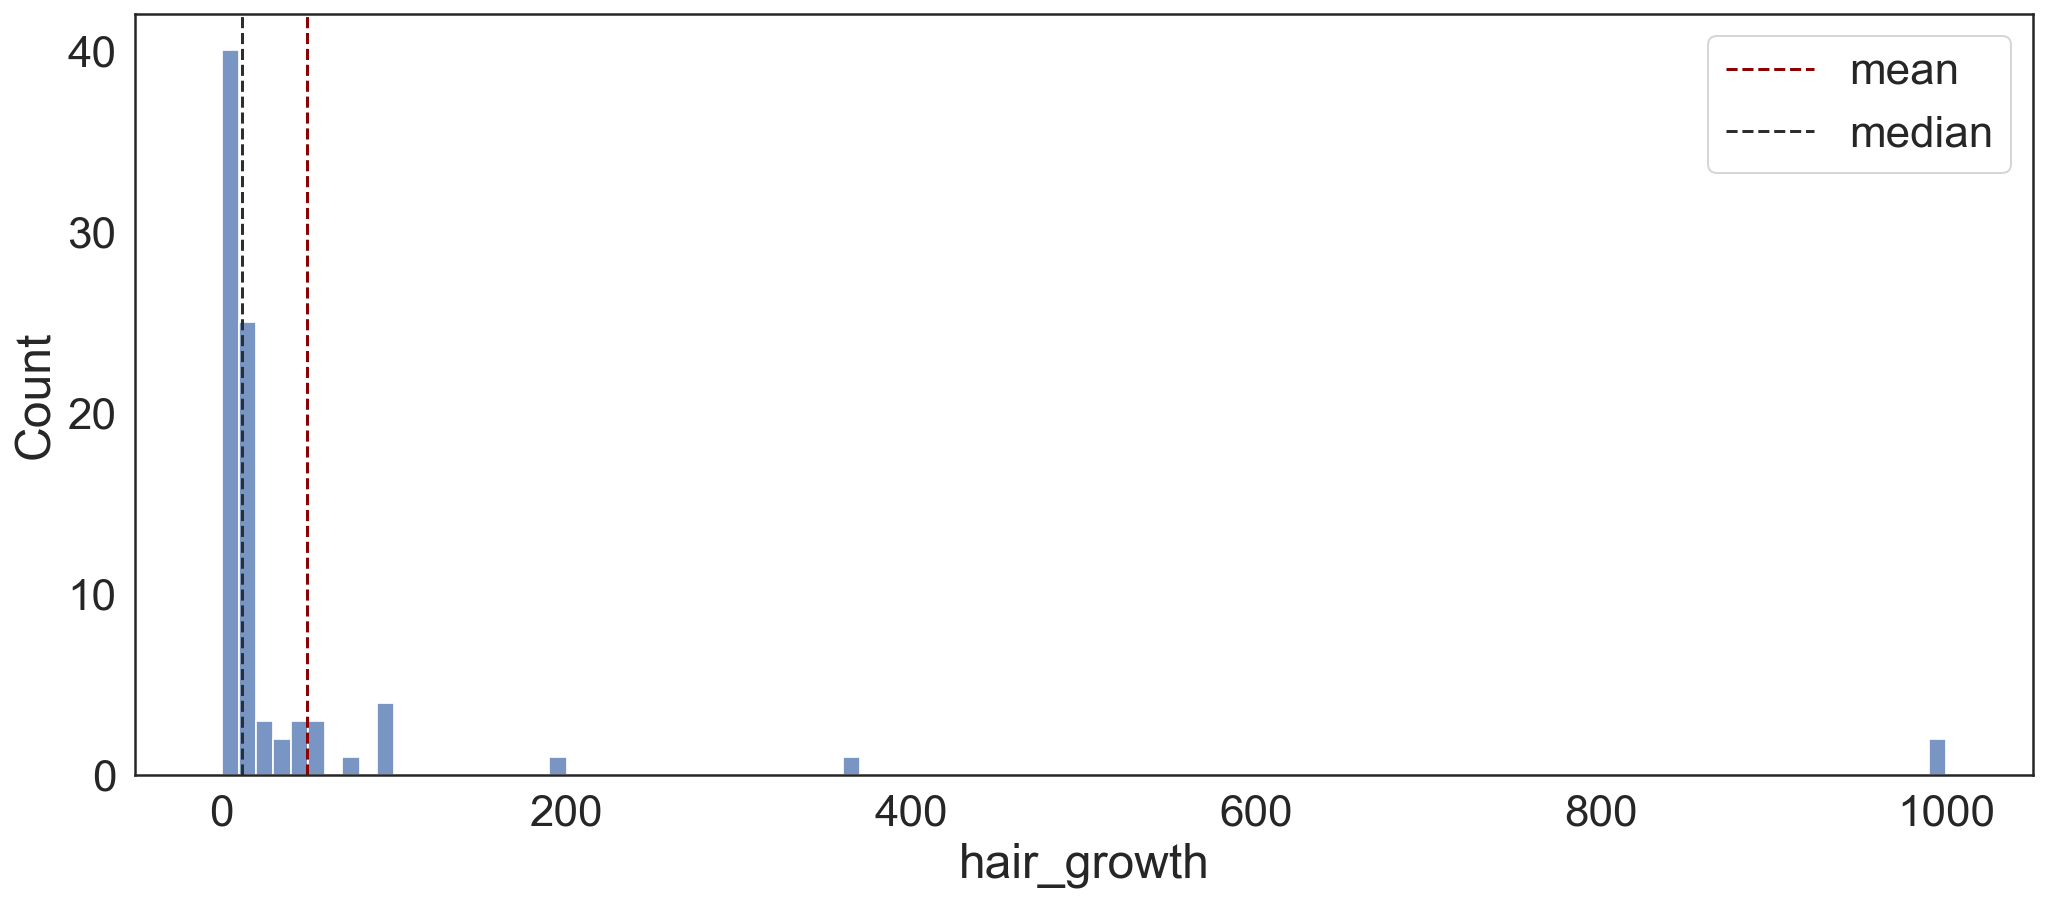

In [40]:
# increase the number of bins here
ax = sns.histplot(df['hair_growth'], bins=100);
ax.axvline(df['hair_growth'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['hair_growth'].median(), color='#2e2e2e', linestyle='--', label='median')
ax.legend();

#### How did y'all do?

In [41]:
# compare to actual value: 15 cm/year (~6 in)
df["hair_growth"].median()

12.0

In [42]:
# compare to actual value: 1,000-10,000 km^2)
df['crammed'].median()

20000.0

In [43]:
# compare to actual value: 38 days)
df['SAN_NYC'].median()

50.0

Calculating the mean and median of your sample is helpful when dealing with **quantitative variables**.

When working with **categorical variables**, knowing the mode is helpful.

### Mode

When working with categorical data, the mode is the most common value in the dataset.

## Variability

- Range
- IQR
- Variance & Standard Deviation

### Range

The highest value minus the lowest value.

In [48]:
# determine the 25th and 75th percentiles
min_val = df['hair_growth'].min()
max_val = df['hair_growth'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

1000.0 - 0.1  =  999.9


### IQR (Interquartile Range)

75th percentile - 25th percentile

In [45]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['hair_growth'], [25, 75])
lower, upper

(8.0, 20.0)

In [46]:
# calculate IQR
iqr = upper - lower
iqr

12.0

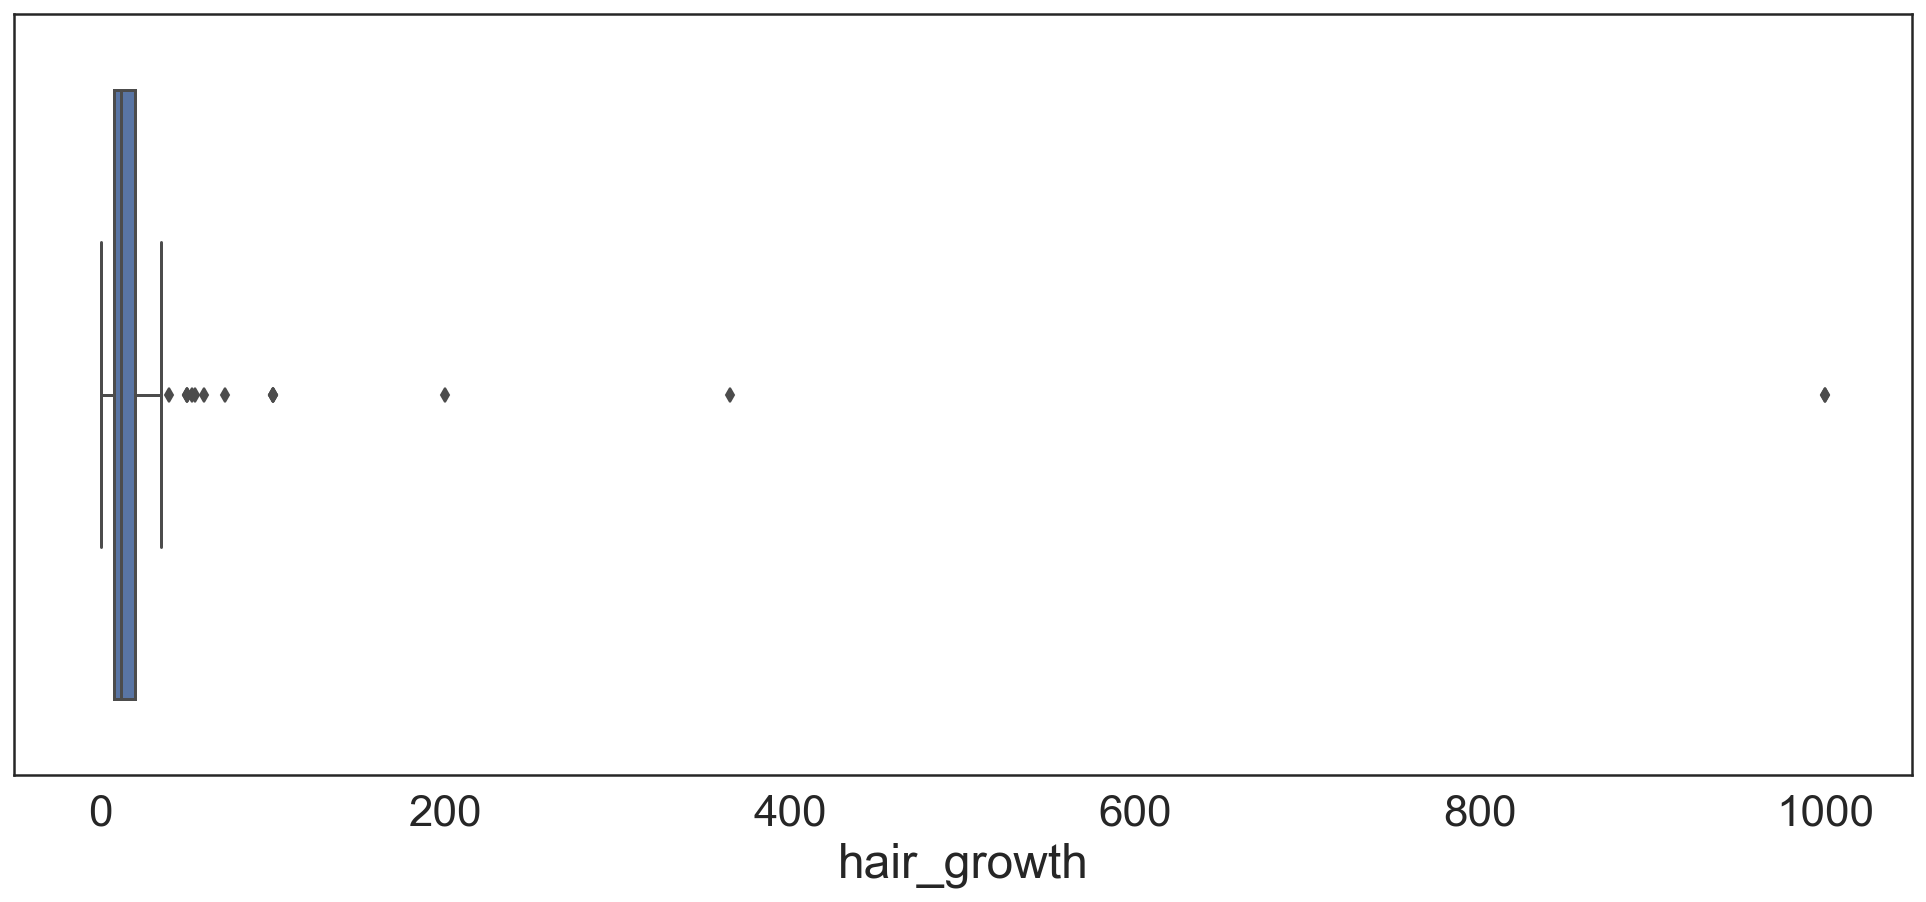

In [47]:
# visualizing IQR
sns.boxplot(x='hair_growth', data=df);

### Variance & Standard Deviation

- variance
    - measures how close the values in the distribution are to the middle of the distribution
    - average squared difference of the scores from  the mean
- standard deviation
    - square root of the variance

#### Variance

$$ s^2 = \frac {\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }} {(N-1)} $$

- $s^2$ = sample variance
- $x_i$ = ith element of the sample
- $\bar x$ = mean of the sample
- $N$ = sample size


In [49]:
# the math behind sample variance
var = sum((df['hair_growth'] - df['hair_growth'].mean()) ** 2 )/(len(df) - 1) 
var

24317.573002801113

In [50]:
# calculate variance using pandas
var = df['hair_growth'].var()
var

24317.57300280112

#### Standard Deviation
square root of the variance

$$ s = \sqrt {\frac {\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }} {(N-1)}} $$

In [51]:
np.sqrt(var)

155.94092792721582

In [52]:
# calculate variance using pandas
sd = df['hair_growth'].std()
sd 

155.94092792721582

## Descriptive Tables

In [53]:
df.describe()

,hair_growth,crammed,SAN_NYC,SAN_NYC_alt
count,85.000000,8.200000e+01,85.000000,83.000000
mean,49.351765,2.565608e+11,1530.776471,1531.156627
std,155.940928,2.209975e+12,10879.608549,11009.044587
min,0.100000,4.000000e-02,3.000000,3.000000
25%,8.000000,1.250000e+03,20.000000,20.000000
50%,12.000000,2.000000e+04,50.000000,50.000000
75%,20.000000,1.875000e+06,120.000000,110.000000
max,1000.000000,2.000000e+13,100000.000000,100000.000000


![descriptive table](img/descriptive.png)

### Why Central Tendency Doesn't Tell the Whole Story

In [54]:
# generate two different normal distributions
dist_1 = np.random.normal(5, 2, 1000)
dist_2 = np.random.normal(5, 10, 1000)

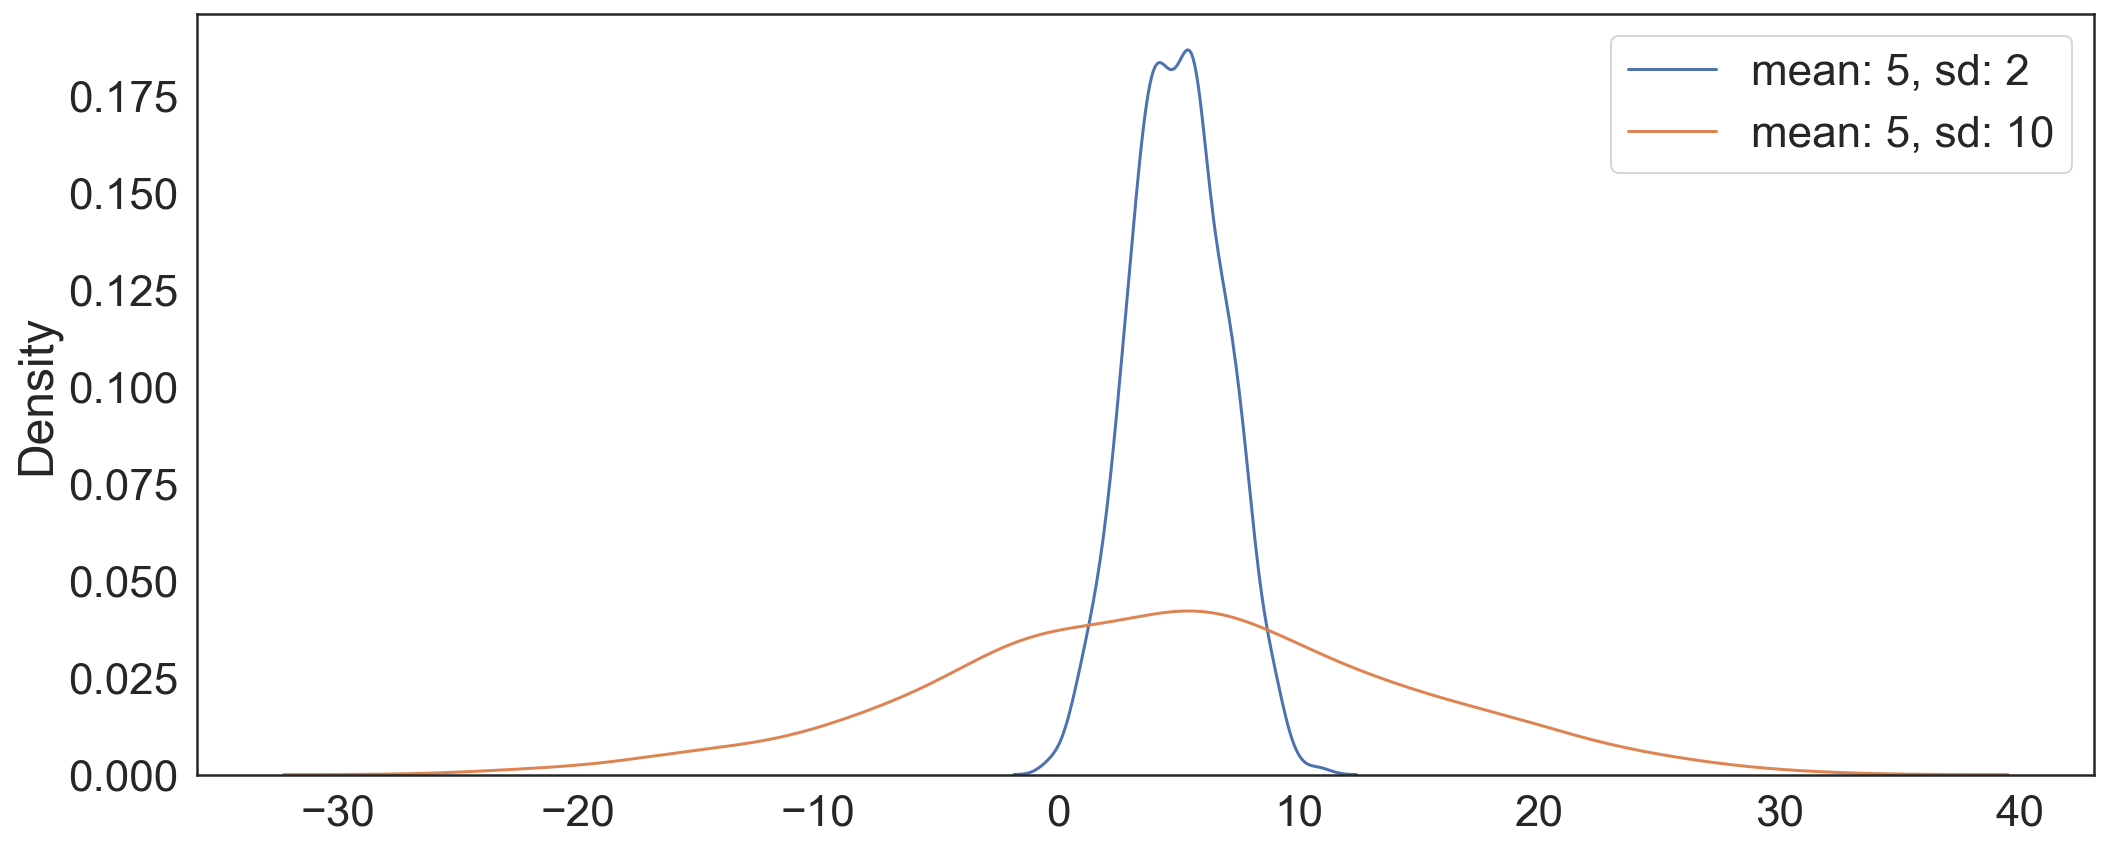

In [55]:
# plot distributions side by side
sns.kdeplot(dist_1, label="mean: 5, sd: 2")
sns.kdeplot(dist_2, label="mean: 5, sd: 10")
plt.legend();

## Anscombe's Quartet: A Cautionary Tale

Code in this example taken from [here](https://matplotlib.org/gallery/specialty_plots/anscombe.html).

In [56]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


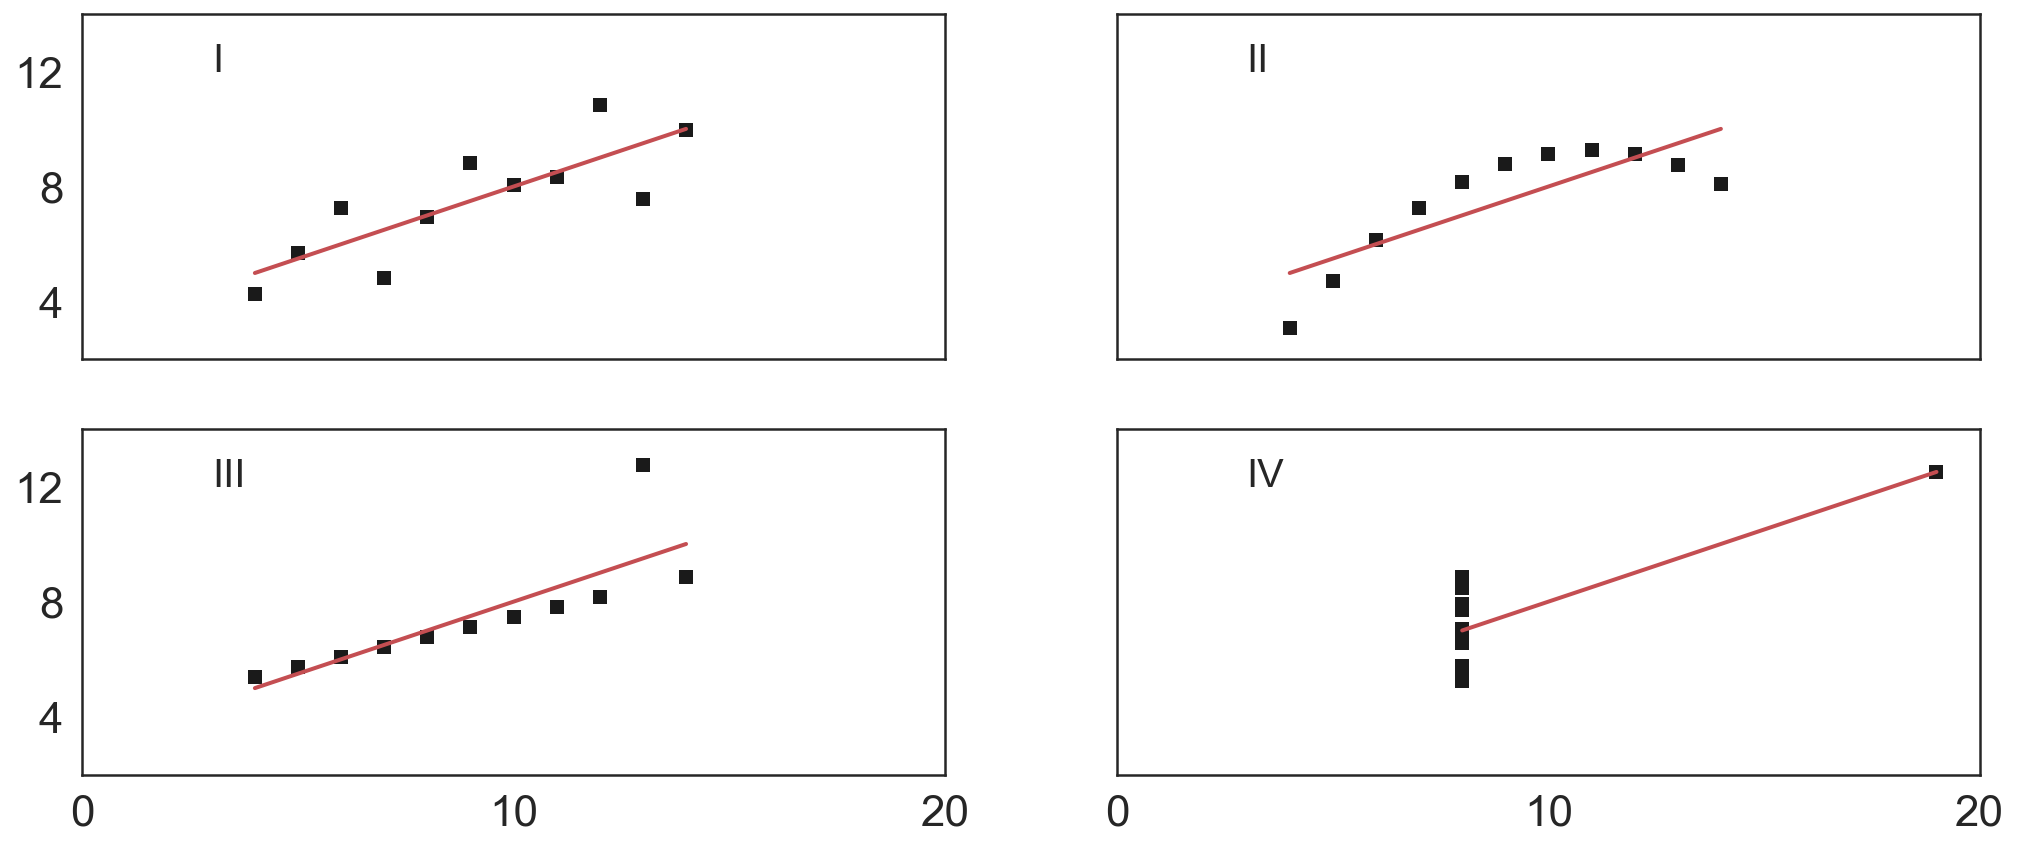

In [57]:
def fit(x):
    return 3 + 0.5 * x

xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

### Draw the Graph (What EDA is all about!)